<a href="https://colab.research.google.com/github/AnaGutson/AlgebraII/blob/main/Guia_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guía 2**

In [ ]:
from sympy import *
from sympy import I as i
init_printing(use_unicode=True)
from typing import List, Dict
import numpy as np
import matplotlib.pyplot as plt
from math import e as e


## **General**

###**Triángulo de Pascal**

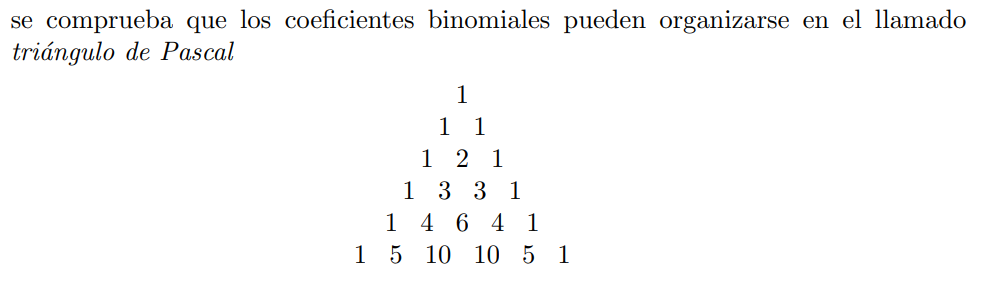

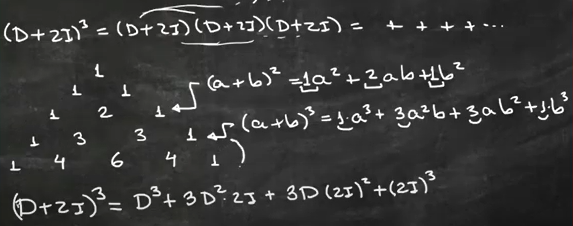

### **Producto Vectorial**

In [ ]:
def vectorial_product(A,B):
  a = Matrix([[A[1], A[2]], [B[1], B[2]]]).det()
  b = Matrix([[A[0], A[2]], [B[0], B[2]]]).det()
  c = Matrix([[A[0], A[1]], [B[0], B[1]]]).det()
  return Matrix([a, -b, c])

### **Matrices**

In [ ]:
'''
  A.inv                                   -> La inversa de A
  A.T                                     -> La transpuesta de A
  A.transpose()                           -> La transpuesta de A
  A.det                                   -> Determinante de A
  A.normalized()                          -> Matriz normalizada
  A.rref()                                -> Matriz triangulada
  A[1,0]                                  -> Posicion segunda fila primera columna
  A[:,0]                                  -> La primera columna de A
  A[0,:]                                  -> La primera fila de A
  A.col(0)                                -> La primera columna de A
  A.subs(t, pi/3)                         -> Reemplaza las t por pi/3
  A.subs({x1:1, x2:5, x3:7})               -> Reemplaza x1 por 1, x2 por 5...
  Z = zeros(2,1)                          -> Matriz de 0s de 2 filas 1 columna
  eye(n)                                  -> Matriz identidad en n x n
  Matrix.hstack(v1,v2)                    -> Matriz con columnas v1, v2
  Matrix.vstack(v1,v2)                    -> Matriz con filas v1, v2
  Lambda = diag(2, 2, 3)                  -> Matriz diagonal
  x, parametro = B.gauss_jordan_solve(v)  -> Solucion de B.x = v
  simplify(A)                             -> Simplifica A
  expand(A)                               -> Expande A
  n, m = A.shape                          -> Cantidad filas y columnas de A
'''

#Escritura de matriz, ejemplos:

U = Rational('1/3') * Matrix([[ 2, 2, 1],
                              [-2, 1, 2],
                              [ 1,-2, 2]])
  
#___________________________________________

t = Symbol('t')
A = Matrix([[ cos(t), -sin(t)],
            [ sin(t), cos(t)]])
A = A.subs(t, pi/3)

### **Polinomios**

In [ ]:
'''
  diff(p,x) -> La derivada de p respecto de x
  p.subs(x,1) -> p(1)
  p.factor() -> factoriza un polinomio
  p.roots() -> las raices del polinomio
  P = plot(p,(x,0,2)) -> grafico del polinomio con x entre 0 y 2
  P = plot(*L, (x,0,2)) -> grafico de una lista de polinomios con x entre 0 y 2
  P[0].line_color = 'red' -> color del primer polimonio
  P.show() -> muestra el grafico del polinomio con x entre 0 y 10
'''

#Escritura de polimomio, ejemplos:

x, a0, a1, a2 = symbols('x, a0, a1, a2')
p = a0 + a1*x + a2*x**2

### **Combinación Lineal**

In [ ]:
def gauss_jordan_con_generadores(A: Matrix, z: Matrix): #devuelve la solucion de gauss jordan entera, la sol part y sus generadores
  x, p = A.gauss_jordan_solve(z) 
  
  #hallo sol particular
  x_0 = x
  for i in range(len(p)):  
    x_0 = x_0.subs({p[i]:0}) 
  
  #hallo generadores
  generadores = []
  for i in range(len(p)):
    x_i = x - x_0
    for j in range(len(p)):
      if j != i:
        x_i = x_i.subs({p[j]:0})
    x_i = x_i.subs({p[i]:1})
    generadores.append(x_i)
    
  return x, x_0, generadores

### **Independencia Lineal**

In [ ]:
def encontrar_vector_li_a_conjunto(A: List[Matrix]):  #Principio de sustitución de Steinez
  cant_filas, _ = A[0].shape
  A_ld = Matrix.hstack(*A, eye(cant_filas,cant_filas))
  A_li = obtener_vectores_li(A_ld)
  return A_li

#_______________________

def obtener_vectores_li(A: Matrix):
  E_A, pivotes_A = A.rref()
  A_li = []
  for pivote in pivotes_A:
      A_li.append(A.col(pivote))        #De la matriz original
  return A_li

#_______________________

'''
  Ejemplo:
  B = [Matrix([a, 1, 2]), Matrix([3, 2, 3]), Matrix([1, -a, 1])] #una lista
  encontrar_a(B, a)
'''
a = Symbol('a')
def encontrar_a(B: List[Matrix], a: Symbol): #Halla el o los valores que puede tener a para que los vectores sean linealmente independientes: formen una base

    return solve(det(Matrix.hstack(*B)), a)

### **Subespacios**

*   $rango(A)$ $:=$ cantidad de pivotes de $E_A$.
*   $rango(A)$ $:=$ cantidad de filas no nulas de $E_A$.
*   $rango(A)$ $:=$ cantidad de columnas basicas de $A$.

*   $rango(A)$ = $dim(col(A))$ = $dim(fil(A))$.

*   $dim(nul(A))$ = $n$ − $rango(A)$ = $n$ − $dim(col(A))$

  Siendo $n$ = cantidad de columnas de $A$ 

*   $dim(nul(A^T))$ = $m$ − $dim(col(A^T))$ = $m$ − $dim (fil(A))$.

  Siendo $m$ = cantidad de filas de $A$ 

*   yapa: $dim(\mathbb{S})$ = $dim(\mathbb{V})$ - número ecuaciones.


$Bx=v$ tiene solución si y solamente si $v ∈ col(B)$

*   $Bx=v$ tiene solución única $<=>$ las columnas de A forman un conjunto LI $<=>$ $Nul(A)$ = 0 
 
  Si tiene solución única, puedo hacer x = $B^{-1}.v$
*   $Bx=v$ tiene $\infty$ soluciones $<=>$ las columnas de A forman un conjunto LD $<=>$ $Nul(A)$ $\neq$ 0 



In [ ]:
'''  
  A.nullspace() -> devuelve el espacio nulo de A 
  A.columnspace() -> devuelve el espacio columna de A
  A.T.columnspace() -> devuelve el espacio columna de A traspuesta
  A.T.nullspace() -> devuelve el espacio nulo de A traspuesta
  n, m = A.shape -> cantidad de filas y columnas de la matriz
'''

'''
    S: lista de los vectores que generan al subespacio S
    Los pivotes empiezan en 0 (por ej: la segunda columna figuraría con el pivote 1)
'''
def algoritmo_espacio_columna(S: List[Matrix]): #Encuentra el espacio columna de un subespacio
    B_S = Matrix.hstack(*S)
    E_S, pivotes_S = B_S.rref()
    S_li = []
    for pivote in pivotes_S:
        S_li.append(S[pivote])        #De la matriz original
    return S_li, pivotes_S #devuelve la matriz con los vectores que generan el espacio columna y los índices de los pivotes.    

def algoritmo_espacio_filas(S: List[Matrix]): #Encuentra el espacio fila de un subespacio
    B_S = Matrix.hstack(*S).T
    E_S, pivotes_S = B_S.rref()
    S_li = []
    for pivote in pivotes_S:
        S_li.append((E_S[pivote,:]).T) #De la matriz escalonada
    return S_li, pivotes_S #devuelve la matriz con los vectores que generan el espacio fila y los índices de los pivotes.     


'''
    Verifica si dos subespacios son el mismo subespacio devolviendo True para ese 
    caso y False en caso contrario.
    
    Ejemplo:
    S1 = [Matrix([-4, -5, -3]), Matrix([26, 41, 23])]
    bien = [Matrix([11, 18, 10]), Matrix([15, 23, 13])]
    mal_1 = [Matrix([-3, 10, 8]), Matrix([-6, 11, 10])]
    mal_2 = [Matrix([7, 12, 2]), Matrix([9, 14, 1])]
    mal_3 = [Matrix([7, 2, 12]), Matrix([9, 1, 14]), 2 * Matrix([9, 1, 14])]

    dos_subespacios_generan_el_mismo_subespacio(S1, bien), dos_subespacios_generan_el_mismo_subespacio(S1, mal_1), dos_subespacios_generan_el_mismo_subespacio(S1, mal_2), dos_subespacios_generan_el_mismo_subespacio(S1, mal_3)
'''
def dos_subespacios_generan_el_mismo_subespacio(S1: List[Matrix], S2: List[Matrix]):
    
    S1_li, pivotes_S1 = algoritmo_espacio_columna(S1)
    S2_li, pivotes_S2 = algoritmo_espacio_columna(S2)
    
    B_S1_li = Matrix.hstack(*S1_li)
    B_S2_li = Matrix.hstack(*S2_li)
    
    B = Matrix.hstack(B_S1_li, B_S2_li)
    _, pivotes_B = B.rref()
    
    return len(pivotes_B) == len(pivotes_S1) and len(pivotes_B) == len(pivotes_S2)
    

### **Ínfimo y Supremo**

In [ ]:
'''
cant_neg: cantidad de vectores que pertenecen al segundo subespacio
'''
def interseccion_S1_S2_dos_lados(S1: List[Matrix], S2: List[Matrix]):
  S2_neg = [i*(-1) for i in S2]
  B_S1_S2 = Matrix.hstack(*S1,*S2_neg)
  cant_S2 = len(S2)
  nul_B_S1_S2 = B_S1_S2.nullspace()
  S1_int_S2 = []
  for v in nul_B_S1_S2:
      v[(-1)*cant_S2:,:] = zeros(cant_S2, 1)
      S1_int_S2.append(B_S1_S2 * v)

  return S1_int_S2

def union_S1_S2(S1: List[Matrix], S2: List[Matrix]):
    B_S1_S2 = Matrix.hstack(*S1,*S2)
    S1_un_S2 = obtener_vectores_li(B_S1_S2)
    return S1_un_S2                

## **Específico**

###**Transformaciones Lineales**

*Se dice que T es una transformacion lineal de $\mathbb{V}$ en $\mathbb{W}$ cuando satisface las siguiente propiedades:*

1.   *Aditividad: $T(v_1 + v_2) = T(v_1) + T(v_2)$ para todo $v_1, v_2 \in \mathbb{V}$.*
2.   *Homogeneidad: $T(a.v) = a.T(v)$ para todo $v \in \mathbb{V}$, $a \in \mathbb{K}$.*

Entonces, se cumple que:
$$T(0_{\mathbb V}) = 0_{\mathbb W}$$
___________________
Sea $T$ : $\mathbb{K}^{n} \rightarrow \mathbb{K}^{m}$ una transformación lineal y $\mathbb{B}$ = $\left\{ v_1, ..., v_n\right\}$ una base de $\mathbb{K}^{n}$. La matriz $A_T$ $\in$ $\mathbb{K}^{m \times n}$ es la matriz de la transformación lineal si:

$$A_T = (T(v_1)...T(v_n))$$

siendo que

$$T(\begin{bmatrix}x_1\\...\\x_n\end{bmatrix}) = A_T\begin{bmatrix}x_1\\...\\x_n\end{bmatrix}$$

In [ ]:
#Parametros: T una t.l, B una base    
#Devuelve la matriz de la transformacion lineal T a partir de T y una base
def matriz_tl_con_tl_y_base(T: Matrix, B: List[Matrix]): #la matriz de T a partir de B
  TB = Matrix() 
  for i in B:
    ti = T*i
    TB = Matrix.hstack(TB, ti)
  return TB


#Parametros: B una base, W  los transformados de B    
#Devuelve la matriz de la transformacion lineal T a partir de una base, y los transformados de la base    
def matriz_tl_con_base_y_transformados(B: List[Matrix], W: List[Matrix]): #la matriz de T a partir de los transformados de B
    return Matrix.hstack(*W) * Matrix.hstack(*B).inv()

#Parametros: T una t.l, p una lista de polinomios
#Devuelve T(polinomios)
def transformacion_lineal_pol(T: Matrix, polinomios):
  polinomios = [Matrix([i]) for i in polinomios]
  P = Matrix.vstack(*polinomios)
  return (expand(T*P))[0,0] #devuelvo el elemento que está en formato Matriz

### **Monomorfismo, epimorfismo e isomorfismo**

*   $T$ es inyectiva $\Leftrightarrow$ $T$ es monomorfismo.

  $T(x) = T(y) \Rightarrow x = y \quad\quad$ "cosas distintas a lugares distintos" 

*   $T$ es sobreyectiva $\Leftrightarrow$ $T$ es epimorfismo.

  $y = T(x) \quad \forall y \in \mathbb{W} \quad\quad\quad$ "ningún elemento del codominio está libre" 

*   $T$ es biyectiva $\Leftrightarrow$ $T$ es isomorfismo.

  Si $T$ es inyectiva y sobreyectiva $\Leftrightarrow$ Si $T$ es monomorfismo y epimorfismo

______________


*   $dim(Nu(T)) + dim(Im(T)) = dim(\mathbb{V})$

*   $T$ es monomorfismo $\quad\Leftrightarrow\quad$ $Nu(T) = \left\{ 0_{\mathbb W}\right\}$

*   $T$ es epimorfismo $\quad\quad\Leftrightarrow\quad$ $Im(T) = \mathbb W$ $\quad\quad\Leftrightarrow\quad$ $dim(Im(T)) = dim(\mathbb W)$

*   $T$ es monomorfismo $\Rightarrow$ $dim(\mathbb V) \leq dim(\mathbb W)$

*   $T$ es epimorfismo $\quad\Rightarrow$ $dim(\mathbb V) \geq dim(\mathbb W)$

*   $T$ es isomorfismo $\quad\Rightarrow$ $dim(\mathbb V) = dim(\mathbb W)$

______________

**Solución de $T(v) = w$**

*    Si $w \notin Im(T) \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \Rightarrow \quad$ Sistema Incompatible
*    Si $w \in Im(T)$ y $T$ es un monomorfismo $\quad \quad \Rightarrow \quad$ Sistema Compatible Determinado
*    Si $w \in Im(T)$ y $T$ no es un monomorfismo $\quad \Rightarrow \quad$ Sistema Compatible Indeterminado

In [ ]:
def clasificacion(At: Matrix):
  imT = At.columnspace()
  nuT = At.nullspace()

  dimW, dimV = At.shape
  if len(nuT) == 0 and len(imT) == dimW:
    return 'T es un isomorfismo'
  else:
    if len(nuT) == 0:
      return 'T es un monomorfismo'
    elif len(imT) == dimW:
      return 'T es un epimorfismo'
  
  return 'T no es un monomorfismo ni un epimorfismo'

### **Imagen y Preimagen**

Sean $v \in \mathbb{V}$ y $w \in \mathbb{W}$. Si $T(v) = w$ se dice que $w$ es la *imagen* de $v$ por $T$. Entonces, la imagen de la transformación lineal es

$$
\begin{aligned}
  Im(T) &= T(\mathbb{K}^{n}) = T (\begin{bmatrix}x_1\\...\\x_n\end{bmatrix}) = A_T\begin{bmatrix}x_1\\...\\x_n\end{bmatrix} = \begin{bmatrix}A_{T_1} & ... & A_{T_n}\end{bmatrix}\begin{bmatrix}x_1\\...\\x_n\end{bmatrix} =\\
        &= x_1 A_{T_1} + ... + x_n A_{T_n} = gen \left\{ A_{T_1}, ..., A_{T_n}\right\} = col(A_T) 
\end{aligned}
$$

Es decir, 
$$Im(T) = col(A_T) \quad\Rightarrow\quad B_{Im(T)} = B_{col(A_T)}$$
$$dim(Im(T)) = rango(A_T)$$
________________________

El conjunto de todas las imágenes inversas de $w$ por $T$ se denomina la *preimagen* de $w$ en $\mathbb V$ y se designa con $T^{−1}(w)$

$$T^{−1}(w) := \left\{v ∈ \mathbb V : T(v) = w \right\}$$

La preimagen se puede escribir como

$$T^{−1}(w) := v_p + Nu(T)$$

Siendo $T(v) = w$

\begin{align}
T(T^{−1}(w)) = w & & T^{−1}(T(v)) = v 
\end{align}
________________________


Para obtener la preimagen de un subespacio $U$ por $T$ se puede proceder de dos maneras (yo entiendo una sola, así que escribo solo esa)

$\rightarrow$ *Me dan $U$ con ecuaciones, formando esta la matriz $A_U$.



**Forma 1**: con $A_T$

Se sabe que:
* $T(x) = A_Tx$
* $T(x) = y$, siendo $y \in U$

Es decir,
$$
  T(x) = A_Tx
  \quad \Leftrightarrow \quad
  \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} = A_T \begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}
$$

Además

$$
  \left\{ \begin{array}{lcc}
              a_1.y_1 + b_1.y_2 + c_1.y_3 = 0 \\
              a_2.y_1 + b_2.y_2 + c_2.y_3 = 0 \\
              a_3.y_1 + b_3.y_2 + c_3.y_3 = 0
          \end{array}
  \right.
  \quad \rightarrow \quad
  \underbrace{\begin{bmatrix}a_1.y_1 + b_1.y_2 + c_1.y_3\\a_2.y_1 + b_2.y_2 + c_2.y_3\\a_3.y_1 + b_3.y_2 + c_3.y_3\end{bmatrix}}_{Ecuaciones \space de \space U} =\begin{bmatrix}0\\0\\0\end{bmatrix}
  \quad \Leftrightarrow \quad
  \underbrace{\begin{bmatrix}a_1&b_1&c_1\\a_2&b_2&c_2\\a_3&b_3&c_3\end{bmatrix}}_{A_U} \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} =\begin{bmatrix}0\\0\\0\end{bmatrix}
  \quad \Leftrightarrow \quad
  A_U \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} =\begin{bmatrix}0\\0\\0\end{bmatrix}
$$

Se junta la información:
$$
  A_U \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} =\begin{bmatrix}0\\0\\0\end{bmatrix}
  \quad \Leftrightarrow \quad
  A_U A_T \begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix} =\begin{bmatrix}0\\0\\0\end{bmatrix}
$$

Finalmente,

$$
T^{-1}(y) = Nul(A_UA_T)
$$

**Forma 2**: con $\mathcal B$ y $\mathcal W$ 

Se sabe que:
* $T(x) = y$, siendo $y \in U$

Es decir que

$$
  T\left(\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}\right) = \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix}
$$



Además se sabe que:
* $\mathcal B = \{ v_1 , v_2, v_3\}$ es una base.

* $T(\mathcal B) = \mathcal W$, siendo $\mathcal W = \{ w_1 , w_2, w_3\}$

Es decir,

\begin{align}
  T(v_1) = w_1,
  &&
  T(v_2) = w_2,
  &&
  T(v_3) = w_3
\end{align}

Como $\mathcal B$ es una base, se puede asegurar que cualquier $x$ se puede escribir como combinación lineal de los elementos de $\mathcal B$: 


$$
  \begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix} = \alpha v_1 + \beta v_2 + \gamma v_3 = \underbrace{\begin{bmatrix}v_1&v_2&v_3\end{bmatrix}}_{A_{\mathcal B}} \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix} =
  A_{\mathcal B} \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix}
$$

Por definición de la transformación lineal:

\begin{aligned}
  \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} = T\left(\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}\right) &=
  T(\alpha v_1 + \beta v_2 + \gamma v_3) =
  T(\alpha v_1) + T(\beta v_2) + T(\gamma v_3) =\\
  &= \alpha T(v_1) + \beta T(v_2) + \gamma T(v_3) =
  \alpha w_1 + \beta w_2 + \gamma w_3 =\\
  &= \underbrace{\begin{bmatrix}w_1&w_2&w_3\end{bmatrix}}_{A_{\mathcal W}} \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix} =
  A_{\mathcal W} \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix}
\end{aligned}

$ \\ $

Por ultimo, se sabe que cualquier transformado por T debe cumplir con:


$
  \left\{ \begin{array}{lcc}
              a_1.y_1 + b_1.y_2 + c_1.y_3 = 0 \\
              a_2.y_1 + b_2.y_2 + c_2.y_3 = 0 \\
              a_3.y_1 + b_3.y_2 + c_3.y_3 = 0
          \end{array}
  \right.\\
$


$$ \rightarrow \quad
  \underbrace{\begin{bmatrix}a_1.y_1 + b_1.y_2 + c_1.y_3\\a_2.y_1 + b_2.y_2 + c_2.y_3\\a_3.y_1 + b_3.y_2 + c_3.y_3\end{bmatrix}}_{Ecuaciones \space de \space U} =\begin{bmatrix}0\\0\\0\end{bmatrix}
  \quad \Leftrightarrow \quad
  \underbrace{\begin{bmatrix}a_1&b_1&c_1\\a_2&b_2&c_2\\a_3&b_3&c_3\end{bmatrix}}_{A_U} \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} =\begin{bmatrix}0\\0\\0\end{bmatrix}
  \quad \Leftrightarrow \quad
  A_U \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} =\begin{bmatrix}0\\0\\0\end{bmatrix}
$$

Se junta la información:

* $
  T\left(\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}\right) = \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} \quad\quad con:
  \begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix} =
  A_{\mathcal B} \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix},
    \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} = 
  A_{\mathcal W} \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix}
  $

* $A_U \begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix} =\begin{bmatrix}0\\0\\0\end{bmatrix}
\quad \Leftrightarrow \quad
A_U A_{\mathcal W} \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix} =\begin{bmatrix}0\\0\\0\end{bmatrix}
\quad \Leftrightarrow \quad
Nul(A_U A_{\mathcal W}) = \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix}$

$ \\ $

$$
\Rightarrow \quad\quad
\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix} =
A_{\mathcal B} \begin{bmatrix}\alpha\\\beta\\\gamma\end{bmatrix}
\quad \Leftrightarrow \quad
\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix} =
A_{\mathcal B} Nul(A_U A_{\mathcal W})
$$

Es decir, 

$$
T^{-1}(y) = A_{\mathcal B} Nul(A_U A_{\mathcal W})
$$

In [ ]:
'''
    Halla la imagen por T de un subespacio S dada una base B y la imagen por T de B
    
    B: es una lista de vectores que conforman la base B
    W: es una lista de vectores que corresponden a las imágenes de los vectores de la base B
    S: es una lista de vectores que generan el subespacio S
'''
def imagen_por_T_de_S_con_B_y_W(B: List[Matrix], W: List[Matrix], S: List[Matrix]): 
    # Obtengo la matriz de T
    A_T = matriz_tl_con_base_y_transformados(B, W)

    # Obtengo los transformados de S    
    imagen_T_S = A_T * Matrix.hstack(*S)

    # Armo una base con los transformados de S    
    base_T_S = obtener_vectores_li(imagen_T_S)
    
    return base_T_S

#_______________________________________________________________________________


#Forma 1, explicada arriba
def preimagen_subespacio_con_At(At: Matrix, Au: Matrix):
  
    return (Au*At).nullspace()
    
#_______________________________________________________________________________

#Forma 2, explicada arriba
def preimagen_subespacio_con_B_y_W(B: List[Matrix], W: List[Matrix], Au: Matrix):
    B_matrix = Matrix.hstack(*B)
    W_matrix = Matrix.hstack(*W)

    sol = (Au * W_matrix).nullspace()
    preimagen_U = B_matrix * Matrix.hstack(*sol)

    #Obtengo una base de la preimagen
    B_T_inv_U = obtener_vectores_li(preimagen_U)
    
    return B_T_inv_U


### **Nucleo**

El conjunto $Nu(T) ⊂ \mathbb V$ definido por $Nu(T) := \left\{v ∈ \mathbb V : T(v) = 0 \right\}$ se llama *núcleo* de $T$:

$$
\begin{aligned}
  Nu(T) &= T^{-1}(0) =
  \left\{ \begin{bmatrix}x_1\\\vdots\\x_n\end{bmatrix} :\quad T\left(\begin{bmatrix}x_1\\\vdots\\x_n\end{bmatrix}\right) = \begin{bmatrix}0\\\vdots\\0\end{bmatrix}\right\} =\\
        &= 
  \left\{ \begin{bmatrix}x_1\\\vdots\\x_n\end{bmatrix} :\quad A_T\begin{bmatrix}x_1\\\vdots\\x_n\end{bmatrix} = \begin{bmatrix}0\\\vdots\\0\end{bmatrix}\right\} = Nul(A_T)
\end{aligned}
$$

Es decir, 
$$Nu(T) = Nul(A_T)$$

### **Cápsula**

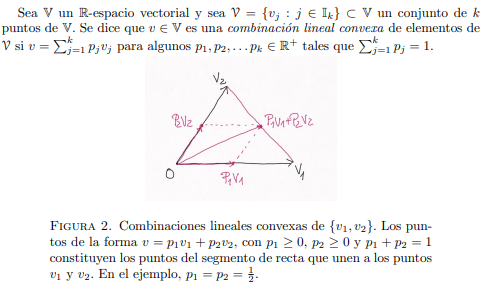

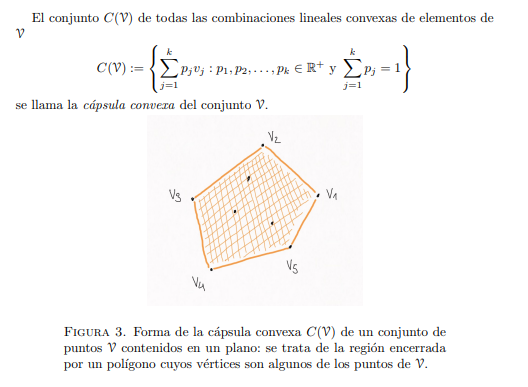

$$
T(\mathcal C(\mathcal V)) = \mathcal C(T(\mathcal V))
$$

###**Extensiones Lineales**

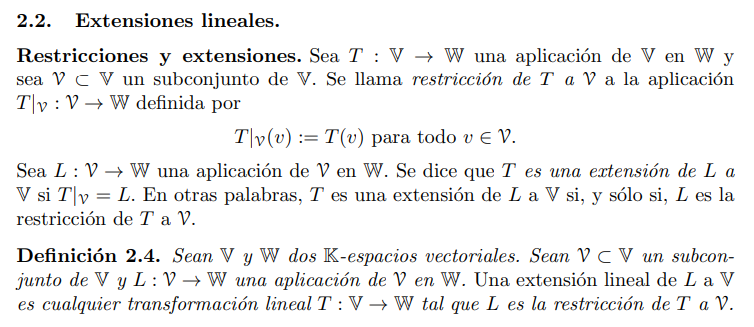

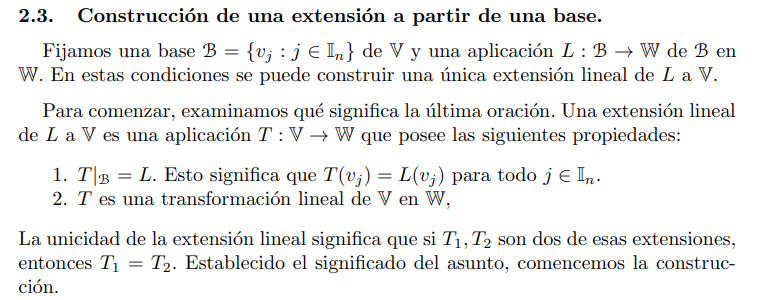

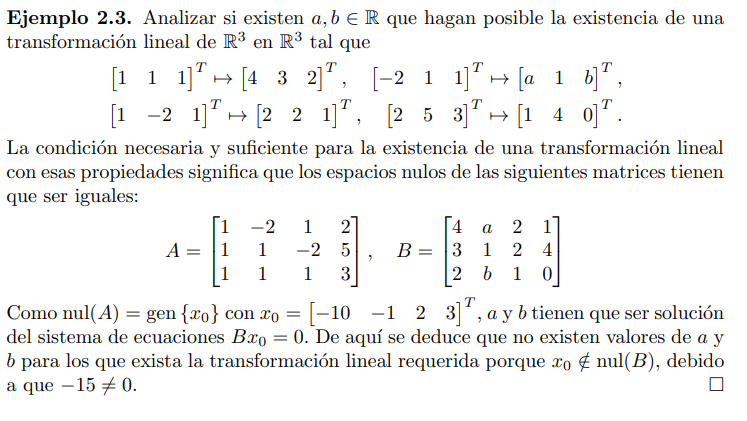

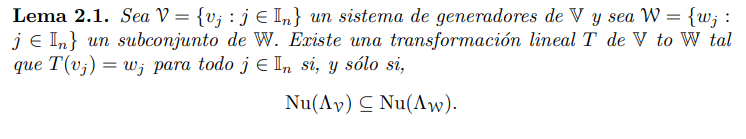

### **Coordenadas**

Sea $T \in \mathcal L (\mathbb V, \mathbb W)$. La matriz $T$ con respecto a las bases $\mathcal B$ y $\mathcal B'$ es la matriz:

$$
[T]^{\mathcal B'}_{\mathcal B}
:=
\begin{bmatrix} \begin{bmatrix}T(v_1)\end{bmatrix}^{\mathcal B'} & ... & \begin{bmatrix}T(v_n)\end{bmatrix}^{\mathcal B'} \end{bmatrix}
$$ 

Para usarla, debo multiplicar por el vector:

$$
[T]^{\mathcal B'}_{\mathcal B}
\begin{bmatrix}v\end{bmatrix}^{\mathcal B}
=
\begin{bmatrix}T(v)\end{bmatrix}^{\mathcal B'}
$$ 

**Observación**

Vale entonces que:

\begin{aligned}
  v &= \alpha _1 v_1 + ... + \alpha _n v_n
  \\ 
  T(v) &= \alpha _1 T(v_1) + ... + \alpha _n T(v_n)
  \\ 
  \begin{bmatrix}T(v)\end{bmatrix}^{\mathcal B'}
  &=
  \alpha _1 \begin{bmatrix}T(v_1)\end{bmatrix}^{\mathcal B'} + ... + \alpha _n \begin{bmatrix}T(v_n)\end{bmatrix}^{\mathcal B'}
  =
  \begin{bmatrix} \begin{bmatrix}T(v_1)\end{bmatrix}^{\mathcal B'} & ... & \begin{bmatrix}T(v_n)\end{bmatrix}^{\mathcal B'} \end{bmatrix}
  \begin{bmatrix}\alpha _1\\\vdots\\\alpha _3\end{bmatrix}
\end{aligned}


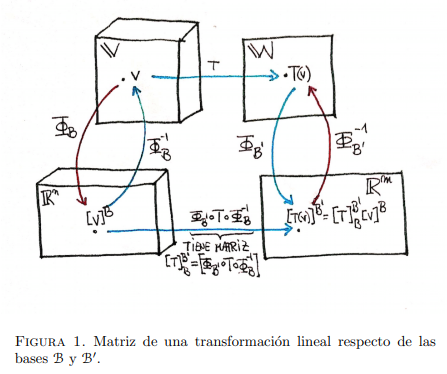

**Cambio de base**

$$
  [T]^{\mathcal B'_2}_{\mathcal B_2} =
   M^{\mathcal B'_2}_{\mathcal B'_1}
  [T]^{\mathcal B'_1}_{\mathcal B_1}
   M^{\mathcal B_1}_{\mathcal B_2} 
$$

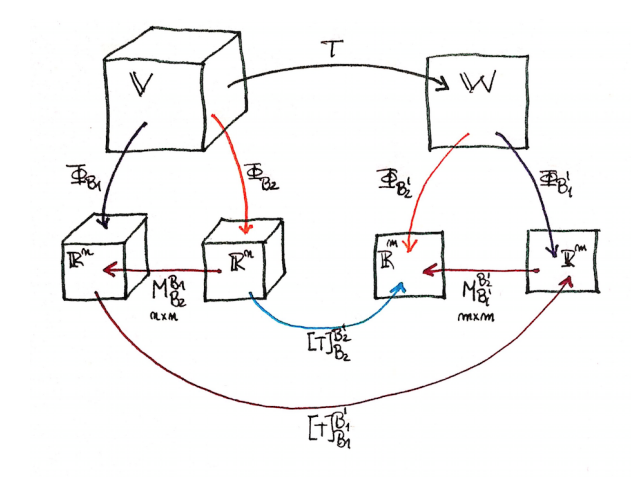

**Imagen y Núcleo**

$$ \phi _{\mathcal B}^{-1}\left(nul\left([T]^{\mathcal B'}_{\mathcal B}\right)\right) = Nu(T),
$$
$$ \phi _{\mathcal B'}^{-1}\left(col\left([T]^{\mathcal B'}_{\mathcal B}\right)\right) = Im(T).
$$

___________________


**Inversa**

$$
  [T^{-1}]^{\mathcal B}_{\mathcal B'} = \left([T]^{\mathcal B'}_{\mathcal B}\right)^{-1}
$$

___________________


**Composición**

$$T1: \mathbb V_1 \rightarrow \mathbb V_2, \quad T2: \mathbb V_2 \rightarrow \mathbb V_3$$


Entonces,
$$T2 \circ T1: \mathbb V_1 \rightarrow \mathbb V_3$$

Tal que:
$$\begin{bmatrix}T2 o T1\end{bmatrix}_{\mathcal A}^{\mathcal C}=\begin{bmatrix}T2\end{bmatrix}_{\mathcal B}^{\mathcal C}\begin{bmatrix}T1\end{bmatrix}_{\mathcal A}^{\mathcal B}$$
___________________


**Clasificación**

* $T$ es un monomorfismo
  $\quad\Leftrightarrow\quad$
  $Nul\left([T]^{\mathcal B'}_{\mathcal B}\right) = \{0\}$
  $\quad \Leftrightarrow \quad$
  $dim\left(Nul\left([T]^{\mathcal B'}_{\mathcal B}\right)\right) = 0$

* $T$ es un epimorfismo
  $\quad\quad\Leftrightarrow\quad$
  $Col\left([T]^{\mathcal B'}_{\mathcal B}\right) = \mathbb K^m$
  $\quad \Leftrightarrow \quad$
  $dim\left(Col\left([T]^{\mathcal B'}_{\mathcal B}\right)\right) = m$

* $T$ es un isomorfismo
  $\quad\quad\Leftrightarrow\quad$
  $[T]^{\mathcal B'}_{\mathcal B}$ es inversible
  $\quad\quad\Leftrightarrow\quad$
  $[T]^{\mathcal B'}_{\mathcal B}$ cuadrada y $det([T]^{\mathcal B'}_{\mathcal B}) \neq 0$


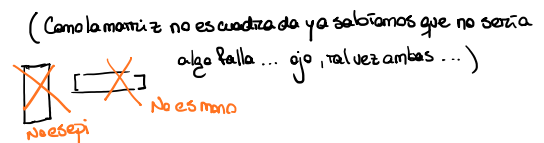

In [ ]:
def coordenadas_v_en_B(v: Matrix, B):
  M_B = Matrix.hstack(*B) 
  
  #v = M_B * [v]^B
  vB, pivotes = M_B.gauss_jordan_solve(v)
  
  return vB

def imagen_de_T_con_At_B_Bprima(At_B_Bprima: Matrix, Bprima: List[Matrix]):
  
  #Obtengo Col(At) = gen{[T(v)]^B' ... }
  imagenBprima = At_B_Bprima.columnspace()

  #Quiero Im(T) = gen{T(v) ... }
  #Es decir, necesito escribir los [T(v)]^B' como T(v)
  #T(v) = M_Bprima * [T(v)]^B'
  imagen = Matrix.hstack(*Bprima) * Matrix.hstack(*imagenBprima)
  
  base_imagen = obtener_vectores_li(imagen)
  
  return base_imagen

def nucleo_de_T_con_At_B_Bprima(At_B_Bprima: Matrix, B: List[Matrix]):
  
  #Obtengo Nul(At) = gen{[x]^B ... }
  nucleoB = At_B_Bprima.nullspace()

  #Quiero Nu(T) = gen{x ... }
  #Es decir, necesito escribir los [x]^B como x
  #x = M_B * [x]^B
  nucleo = Matrix.hstack(*B) * Matrix.hstack(*nucleoB)
  
  base_nucleo = obtener_vectores_li(nucleo)
  
  return base_nucleo

def nucleo_de_T_con_At_B_Bprima_pol(At_B_Bprima: Matrix, B: List[Matrix]):
  
  #Obtengo Nul(At) = gen{[x]^B ... }
  nucleoT = T1oT2inv_Eprima_E.nullspace()
  
  #Quiero Nu(T) = gen{x ... }
  #Es decir, necesito escribir los [x]^B como x
  #x = M_B * [x]^B

  nucleo = Ep * Matrix.hstack(*nucleoT)
  
  return nucleo 

### Graficar

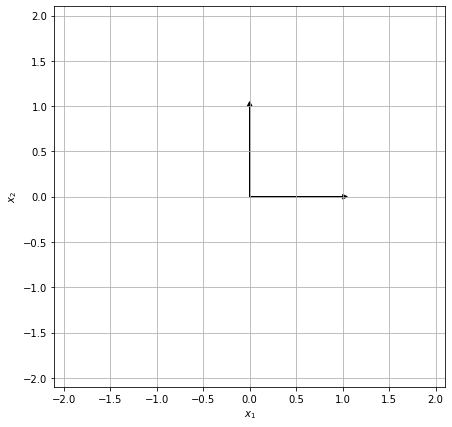

In [ ]:
def plot_vector2d(*vectors,xlim=(0,1),ylim=(0,1)):
  fig, ax = plt.subplots(1,1,figsize=(7,7))

  for v in vectors:
    x, y = float(v[0]), float(v[1])
    ax.arrow(0,0,x,y,head_width=0.05, head_length=0.05, fc='k', ec='k')
  
  ax.set_xlim(*xlim)
  ax.set_ylim(*ylim)
  ax.grid(True)
  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')
  fig.show()
  return fig, ax

def plot_recta_simetria(theta,ax):
  x1, x2 = ax.get_xlim()

  if theta not in [pi/2,-pi/2]:
    y1 = float(tan(theta/2*x1))
    y2 = float(tan(theta/2*x2))
  else:
    y1, y2 = ax.get_ylim()
  
  ax.arrow(x1,y1,x2-x1,y2-y1,fc='b',ec='b')
  return ax


v1, v2 = Matrix([1,0]), Matrix([0,1])
fig, ax = plot_vector2d(v1,v2,xlim=(-2.1,2.1),ylim=(-2.1,2.1))

### **Proyecciones y Simetrías**

Sean $\mathbb S_1$ y $\mathbb S_2$ dos subespacios tal que $\mathbb S_1 \oplus \mathbb S_2 = \mathbb V$.
Sea $v \in \mathbb V$ tal que se puede descomponer en una componente en $\mathbb S_1$ y su componente en $\mathbb S_2$. Es decir, para cada $v$ existen únicos $v_1 \in \mathbb S_1$ y $v_2 \in \mathbb S_2$ (dependientes de $v$) tales que
$$
 v = v_1 + v_2.
$$

Queda definido entonces:

**1.** La proyección de $\mathbb V$ sobre $\mathbb S_1$ en la dirección de $\mathbb S_2$:

$$
\Pi_{\mathbb S_1 \mathbb S_2}(v) := v_1.
$$

**2.** La proyección de $\mathbb V$ sobre $\mathbb S_2$ en la dirección de $\mathbb S_1$:

$$
\Pi_{\mathbb S_2 \mathbb S_1}(v) := v_2.
$$

**3.** La simetría de $\mathbb V$ con respecto a $\mathbb S_1$ en la dirección de $\mathbb S_2$:

$$
\Sigma_{\mathbb S_1 \mathbb S_2}(v) := v_1 - v_2.
$$

**4.** La simetría de $\mathbb V$ con respecto a $\mathbb S_2$ en la dirección de $\mathbb S_1$:

$$
\Sigma_{\mathbb S_2 \mathbb S_1}(v) := v_2 - v_1.
$$

Tal que:

$$
\Pi_{\mathbb S_1 \mathbb S_2}(v) = \left\{
	       \begin{array}{ll}
		 v      & \mathrm{si\ } v \in \mathbb S_1\\
		 0     & \mathrm{si\ } v \in \mathbb S_2
	       \end{array}
	     \right. 
\quad
\Pi_{\mathbb S_2 \mathbb S_1}(v) = \left\{
	       \begin{array}{ll}
		 v      & \mathrm{si\ } v \in \mathbb S_2\\
		 0     & \mathrm{si\ } v \in \mathbb S_1
	       \end{array}
	     \right. 
$$

$ \\ $

$$
\Sigma_{\mathbb S_1 \mathbb S_2}(v) = \left\{
	       \begin{array}{ll}
		 v      & \mathrm{si\ } v \in \mathbb S_1\\
		 -v     & \mathrm{si\ } v \in \mathbb S_2
	       \end{array}
	     \right. 
\quad
\Sigma_{\mathbb S_2 \mathbb S_1}(v) = \left\{
	       \begin{array}{ll}
		 v      & \mathrm{si\ } v \in \mathbb S_2\\
		 -v     & \mathrm{si\ } v \in \mathbb S_1
	       \end{array}
	     \right. 
$$

$ \\ $
________________

$ \\ $

**Propiedades**

$ \\ $
\begin{aligned}
\bullet\quad &\Pi_{\mathbb S_1 \mathbb S_2} + \Pi_{\mathbb S_2 \mathbb S_1} = I _{\mathbb V}\\
\bullet\quad &\Sigma_{\mathbb S_1 \mathbb S_2} + \Sigma_{\mathbb S_2 \mathbb S_1} = O _{\mathbb V^{\mathbb V}}\\
\bullet\quad &\Sigma_{\mathbb S_1 \mathbb S_2} + 2 \Pi_{\mathbb S_2 \mathbb S_1} = I _{\mathbb V}\\
\bullet\quad &\Sigma_{\mathbb S_2 \mathbb S_1} + 2 \Pi_{\mathbb S_1 \mathbb S_2} = I _{\mathbb V}\\
\end{aligned}

Además:

$ \\ $

\begin{aligned}
\bullet\quad &\Pi_{\mathbb S_1 \mathbb S_2}^2 = \Pi_{\mathbb S_1 \mathbb S_2} \quad (\mathrm{Idempotencia\ }) \\
\bullet\quad &\Sigma_{\mathbb S_1 \mathbb S_2}^2  = I _{\mathbb V}\quad\quad (\mathrm{Involucion\ }) \\
\end{aligned}




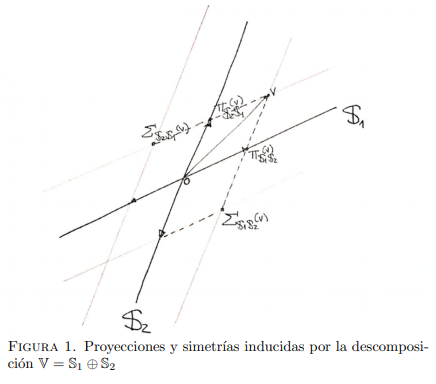

**Caracterización algebraica**

**1.** Si $T \in \mathcal L(\mathbb V)$ es tal que $T^2 = T$, entonces $T$ es la proyección de $\mathbb V$ sobre $Im(T)$ en la dirección de $Nu(T)$.

**2.** Si $T \in \mathcal L(\mathbb V)$ es tal que $T^2 = T$, entonces $S = I_{\mathbb V} - 2T$ es tal que $S^2 = I_{\mathbb V}$

**3.** Si $T \in \mathcal L(\mathbb V)$ es tal que $S^2 = I_{\mathbb V}$, entonces $T = \frac{1}{2}(I_{\mathbb V} - S)$ es tal que $T^2 = T$. En otras palabras, $T$ es una proyección.

**4.** Si $S \in \mathcal L(\mathbb V)$ es tal que $S^2 = I_{\mathbb V}$, entonces $S$ es la simetría de $\mathbb V$ con respecto a $Nu(I_{\mathbb V} - S)$ en la dirección de $Im(I_{\mathbb V} - S)$.

Entonces vale que:

$$
\mathbb V = Nu(I_{\mathbb V} - S) \oplus Nu(I_{\mathbb V} + S)
$$

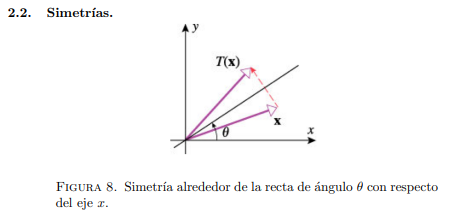

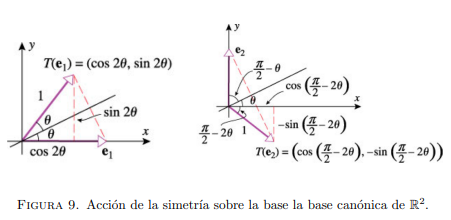

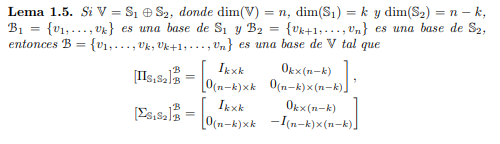

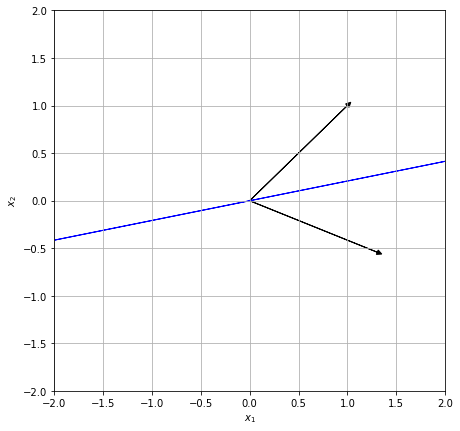

In [ ]:
def simetria(v,theta):
  S = Matrix([[cos(theta), sin(theta)],
              [sin(theta), -cos(theta)]])
  w = S * v
  return w

v = Matrix([1,1])
theta = pi/8

v_s = simetria(v,theta)
fig, ax = plot_vector2d(v,v_s,xlim=(-2,2),ylim=(-2,2))
ax = plot_recta_simetria(theta,ax)

#__________________________

def tipo_tl(T: Matrix):
  T2 = T*T
  n,m = T2.shape
  if T2 == T:
    return 'Es una proyección'
  elif T2 == eye(n,n):
    return 'Es una simetría'
  return 'No es proyección ni simetría'
  


### **Rotaciones**


La acción de la rotación $R_\theta$ sobre cualquier vector $\begin{bmatrix}x & y \end{bmatrix}^T \in \mathbb R^2$ se puede describir de la siguiente manera:

$$
R_\theta\left( \begin{bmatrix} x\\y\end{bmatrix} \right)
=
\begin{bmatrix} R_\theta(e_1) & R_\theta(e_2)\end{bmatrix} \begin{bmatrix} x\\y\end{bmatrix}
=
\begin{bmatrix} cos(\theta) & -sen(\theta) \\ sen(\theta) & cos(\theta)\end{bmatrix} \begin{bmatrix} x\\y\end{bmatrix}
$$ 

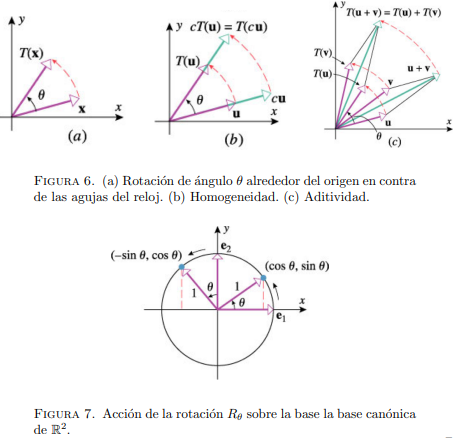

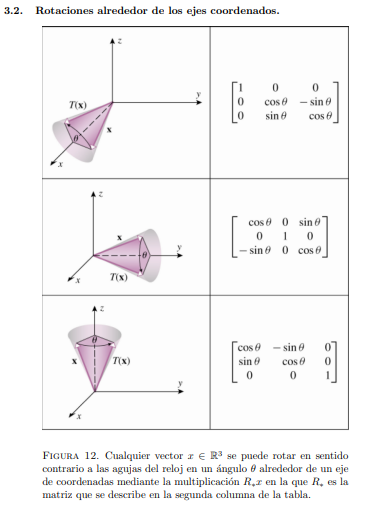

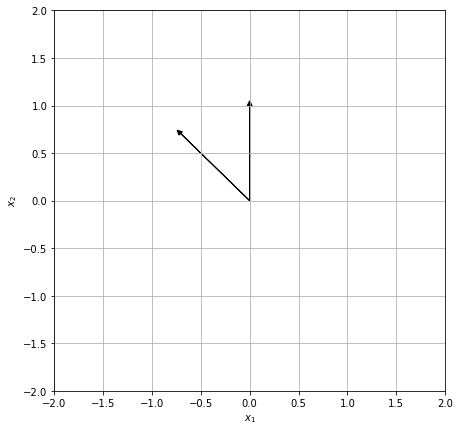

In [ ]:
def rotacion(v,theta):
  R = Matrix([[cos(theta), -sin(theta)],
              [sin(theta), cos(theta)]])
  w = R * v
  return w

#Ejemplo
v = Matrix([0,1])
theta = pi/4

v_r = rotacion(v,theta)
fig, ax = plot_vector2d(v,v_r,xlim=(-2,2),ylim=(-2,2))

### **Ecuaciones Diferenciales**

Un operador diferencial lineal de orden $n$ con coeficientes constantes es una transformación lineal de la forma

$$
L = D^n + a_{n-1} D^{n-1} + ... + a_1 D + a_0 I
$$ 

donde $D$ es el operador de derivación.

Nótese que 

$$
L[y] = y^{(n)} + a_{n-1} y^{(n-1)} + ... + a_1 y' + a_0y
$$

__________________

Una ecuación diferencial lineal de orden $n$ con coeficientes constantes es una ecuación de la forma

$$
L[y] = g
$$

donde $L$ es un operador diferencial lineal de orden $n$ con coeficientes constantes y $g$ es una función suave.

__________________

El polinomio característico del operador $L$ es el polinomio $p \in \mathbb K_n[x]$ definido por 

$$
p = x^n + a_{n-1}x^{n-1} + ... + a_1x + a_0.
$$

__________________

El conjunto de todas las raíces del polinomio característico de $L$,

$$
\sigma (L) = \{ \lambda \in \mathbb C: p(\lambda) = 0 \},
$$

se denomina el espectro de $L$.


Notar que:

$$
gen\{e^{\lambda x}: \lambda \in \sigma (L) \cap \mathbb K \} \subseteq Nu(L)
$$

$ \\ $

Cuando $\lambda$ es un valor imaginario, se utiliza la fórmula de Euler:

$$
e^{a + ib} = e^a(cos(b) + i sen(b)) = e^a cos(b) + e^a i\space sen(b) 
$$

Entonces, 

$ 
L[e^{a + ib}] = L[e^a cos(b) + e^a i\space sen(b)] = L[e^a cos(b)] + iL[e^a sen(b)] \space\textbf{=}\space 0 \quad\Leftrightarrow\quad  L[e^a cos(b)] = L[e^a sen(b)] = 0
$

Se deduce que:

$$
gen\{e^a cos(b), e^a sen(b)\} \subseteq Nu(L)
$$
______



**Análisis de los factores**

$$
(D- \lambda I)^k [f(x)e^{\lambda x}] = f^{(k)} (x)e^{\lambda x}
$$

Entonces:
$$
\left\{p(x)e^{\lambda x}: p \in \mathbb C_{k-1}[x]\right\} ⊆ Nu\left((D-\lambda I)^k\right)
$$

Notar que $(D- \lambda I)^k$ no es monomorfismo pero sí epimorfismo.

$ \\ $

*  Si 
$$
L = (D- \lambda _1 I)^{k_1} (D- \lambda _2 I)^{k_2}
$$
entonces
$$
Nu(L) = Nu\left( (D- \lambda _1 I)^{k_1} \oplus (D- \lambda _2 I)^{k_2}\right)
$$

* Si
$$
L = (D^2 - 2aD + (a^2 - b^2) I)^k
$$
entonces
$$
Nu(L) = \bigoplus_{j=0}^{k-1} gen \{x^j e^{ax}cos(bx), x^j e^{ax}sen(bx) \}
$$


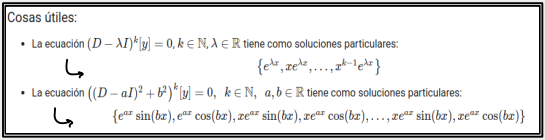

**Método para resolver cualquier ecuación diferencial $(D - \lambda I)^k [y] = g$**

$\quad$ Se hallan $y_p$ y $y_h$ tal que $y = y_p + y_h$:

*  $y_p$ se puede hallar a partir de un aniquilador de $g$.
*  $y_h$ la combinación lineal de los elementos de $Nu(L)$.



In [ ]:
# TODO: EN CONSTRUCCIÓN
def nucleo_de_operador_diferencial(L):
    x = Symbol('x')
    Nu_L = set()
    raices = str(L).split('*')
    l = 1
    for raiz in raices:

      if '-' in raiz:
        index = raiz.index('-') + 1
        l = (int(raiz[index]))*(-1)
      elif '+' in raiz:
        index = raiz.index('+') + 1
        l = (int(raiz[index]))
      else:
        display(raiz)
      
      if '^' in raiz:
        k = int(raiz.split('^')[1])
      else:
        k = 1
          
      for i in range(k):
        Nu_L.add((x**(i))*exp(-l*x))

    return Nu_L

def gen_solucion_particular(L, AoL):
    Nu_L = nucleo_de_operador_diferencial(L)
    Nu_AoL = nucleo_de_operador_diferencial(AoL)
    Nu = set()
    Nu = Nu_L | Nu_AoL
    Nu = Nu - Nu_L
    return list(Nu)

D, I = symbols('D I')
L = '(D-5I)*(D+2I)^2'
AoL = '(D-5I)*(D+2I)^5'
gen_solucion_particular(L, AoL)

### **Aniquiladores**

Un aniquilador de $g$ es un operador diferencial lineal con coeficientes constantes, $A$, tal que $g \in Nu(A)$.
Es decir, $A$ es un aniquilador de $g$ simpre y cuando $A[g] = 0$.

Si $A$ es un operador diferencial lineal con coeficientes constantes de orden positivo, entonces

\begin{aligned}
A[p(x)e^{ax}] &= 0 \Leftrightarrow A = (D- aI)^{deg(p) + 1}q(D),\\
A[p(x)e^{ax}cos(bx)] &= 0 \Leftrightarrow A = (D^2 - 2aD + (a^2 + b^2)I)^{deg(p) + 1}q(D),\\
A[p(x)e^{ax}sen(bx)] &= 0 \Leftrightarrow A = (D^2 - 2aD + (a^2 + b^2)I)^{deg(p) + 1}q(D)
\end{aligned}

donde $deg(p)$ es el grado del polinomio $p$.

$ \\ $

**Método para construir una solución particular $y_p$**:

1. Fijar un aniquilador $A$ de la función $g$.
2. Hallar una base $B_L = \{y_1, \cdots, y_n\}$ de $Nu(L)$.
3. Hallar una base $B_{AL} = \{y_1, \cdots, y_n, z_1, \cdots, z_n\}$ de $Nu(A \circ L)$.
4. Siendo $\mathbb S = gen(B_{AL} \setminus B_L) = gen\{z_1, \cdots, z_m\}$, $$y_p = \sum_{j = 1}^{m} c_j z_j$$

### **Límites Ecuaciones Diferenciales Homogeneas**

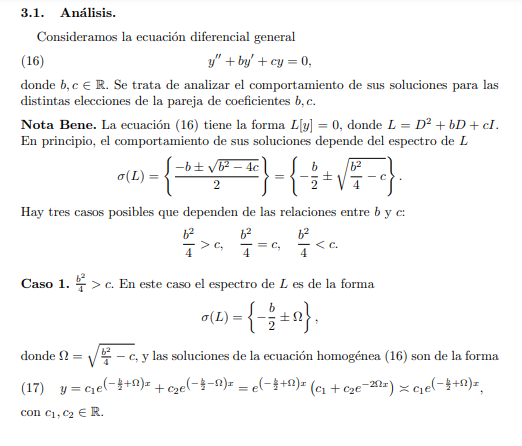

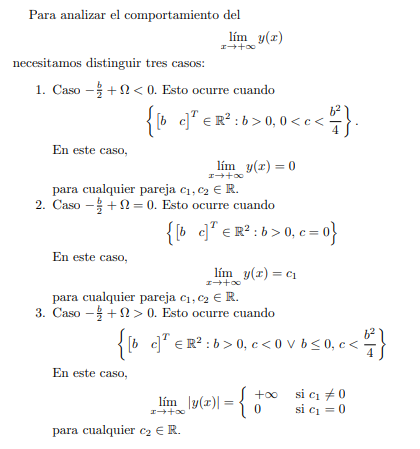

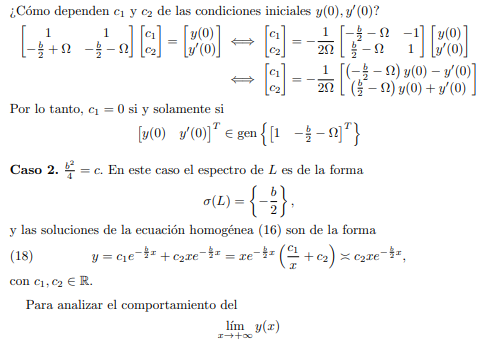

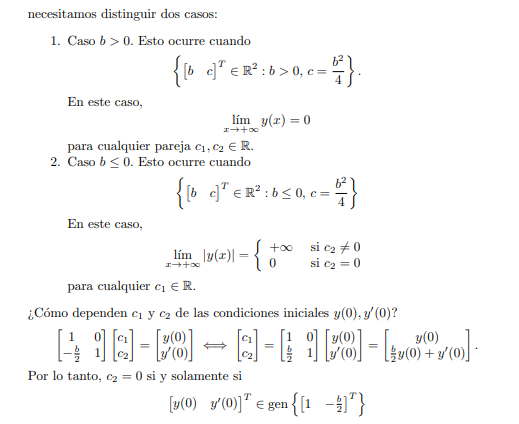

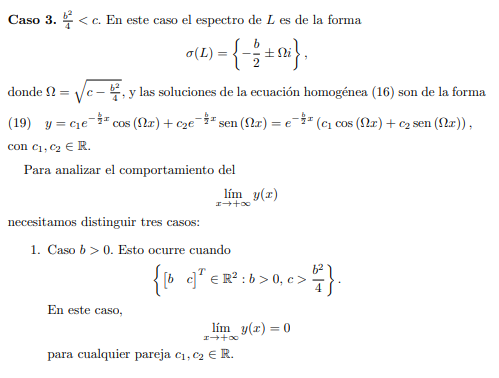

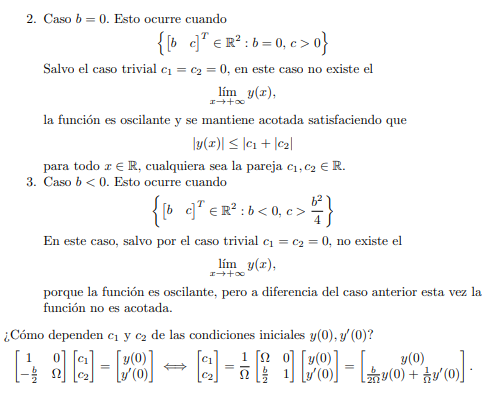

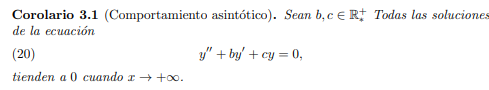

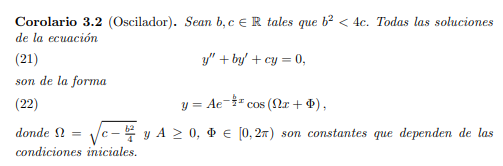

##**Ejercicios**

### **Ejercicios generales**

#### **1.** Sea $T: \mathbb{R}^3 \rightarrow \mathbb{R}^3$ la transformación lineal dada por $A_T =\begin{bmatrix}1&1&1\\1&-1&0\\0&2&1\\\end{bmatrix}$.

##### 1.**a.** Calcular $T(\begin{bmatrix}4\\-1\\3\end{bmatrix})$. Dar una base de $Im(T)$. ¿Es epi?

In [ ]:
#Calculo T(v) = A.v
A = Matrix([[1, 1,  1],
            [1, -1, 0],
            [0, 2, 1]])
v = Matrix([4,-1,3])
A*v 

#Calculo Im(T) = col(A)
imagen = A.columnspace() #la dimension de la imagen de Tes 2

#Es epi? 
#Dimension del espacio de llegada: dim(R^3) = 3
#Dimension de la imagen: dim(imagen) = 2
#Como no son iguales, T no es epi
clasificacion(A)

'T no es un monomorfismo ni un epimorfismo'

##### 1.**b.** Dar una base de $Nu(T)$. ¿Es mono?

In [ ]:
A = Matrix([[1, 1,  1],
            [1, -1, 0],
            [0, 2, 1]])

nuT = A.nullspace() #la dimension del nucleo de T es 1

#Es mono?
#Como dimension del nucleo no es 0, entonces T no es mono
clasificacion(A)

#Verifico el teorema de la dimensión: dim(Im(T)) + dim(Nu(T)) = dim(V)
#                                         2      +     1      =   3


'T no es un monomorfismo ni un epimorfismo'

##### 1.**c.** Mostrar que $\begin{bmatrix}1\\0\\1\end{bmatrix} \in Im(T)$ y resolver $T(X) = \begin{bmatrix}1\\0\\1\end{bmatrix}$ 

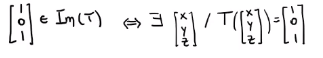

In [ ]:
#T(x) = v
#A.x = v
A = Matrix([[1, 1,  1],
            [1, -1, 0],
            [0, 2, 1]])
v = Matrix([1,0,1])

x = A.gauss_jordan_solve(v)
x #veo que existen infinitos [x y z] tal que A.[x y z] = v    =>    v ∈ Im(T)


⎛⎡1   τ₀⎤      ⎞
⎜⎢─ - ──⎥      ⎟
⎜⎢2   2 ⎥      ⎟
⎜⎢      ⎥      ⎟
⎜⎢1   τ₀⎥, [τ₀]⎟
⎜⎢─ - ──⎥      ⎟
⎜⎢2   2 ⎥      ⎟
⎜⎢      ⎥      ⎟
⎝⎣  τ₀  ⎦      ⎠

#### **2.** Sea $T: \mathbb{R}_2[x] \rightarrow \mathbb{R}_2[x]$ dada por $T(p) =  2p + (1-x^2)p''$.

##### 2.**a** Calcular $T(3x^2 + x)$

In [ ]:
x = Symbol('x')

T = Matrix([2, 1-x**2]).T #una transformacion de R2[x] a R2[x]

q = 3*x**2 + x
q__ = diff(diff(q, x), x)
polinomios = [q, q__]
tq = transformacion_lineal_pol(T, polinomios) #T(3x^2+x)

##### 2.**b.** Dar una base de $Nu(T)$. Dar una base de $\mathbb R_2[x]$ que contenga una base de $Nu(T)$.

$Nu(T) = T^{-1}(0) = \left\{ p \in \mathbb R_2[x] :\quad  T(p) = 0 \right\}$

In [ ]:
x, a_0, a_1, a_2 = symbols('x, a_0, a_1, a_2')

T = Matrix([2, 1-x**2]).T #una transformacion de R2[x] a R2[x]

q = a_0 + a_1*x + a_2*x**2 #pol generico
q__ = diff(diff(q, x),x)
#Busco T(p) = 0

#Averiguo T(p)
tp = transformacion_lineal_pol(T, [q, q__]) #T(3x^2+x) = 2a0 + 2a1x + 2a2
display(tp)
#2*a_0 + 2*a_2 = 0  =>  a0 = -a2
#2*a_1*x = 0  =>  a1 = 0
#Entonces Nu(T) esta generado por p = -a_2 + a_2*x^2 = a_2*(-1 + x^2) 
#Nu(T) = gen{(-1 + x^2)}, dim(Nu(T)) = 1

#_________________________

#Base de R2[x] va a tener dim = 3.
#Nu(T) tiene dim = 1 -> me faltan agregar dos vectores
#Busco una base = {(-1 + x^2), q1, q2}
#Utilizo el Principio de sustitución de Steinez
#Escribo los polinomios como vectores en base 1, x, x**2
v = Matrix([-1, 0, 1])
encontrar_vector_li_a_conjunto([v]) #Entonces B = {(-1 + x^2), 1, x}

⎡⎡-1⎤  ⎡1⎤  ⎡0⎤⎤
⎢⎢  ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0 ⎥, ⎢0⎥, ⎢1⎥⎥
⎢⎢  ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎣⎣1 ⎦  ⎣0⎦  ⎣0⎦⎦

##### 2.**b.** Dar una base de $Im(T)$. ¿Es epi?

In [ ]:
#Transformo base de salida: uso B = {(-1 + x^2), 1, x}

x = Symbol('x')

e1 = -1 + x**2
e2 = 1
e3 = x

T = Matrix([2, 1-x**2]).T #una transformacion de R2[x] a R2[x]

te1 = transformacion_lineal_pol(T, [e1, diff(diff(e1, x), x)]) #es 0, lo ignoro
te2 = transformacion_lineal_pol(T, [e2, diff(diff(e2, x), x)])
te3 = transformacion_lineal_pol(T, [e3, diff(diff(e3, x), x)])
[te2, te3] #dimension es 2, la dimension de W es 3 => no es epi 

#### **3.** Hallar todos los $a \in \mathbb R$ para los cuales existe una transformación lineal $T: \mathbb R^3 \rightarrow \mathbb R^3$
$$\begin{align} T \left(\begin{bmatrix} 1 \\ -1 \\ 1 \end{bmatrix}\right) = \begin{bmatrix} 2 \\ a \\ -1\end{bmatrix}
&& T \left( \begin{bmatrix} 1 \\ -1 \\ 2 \end{bmatrix} \right) = \begin{bmatrix} a^2 \\ -1 \\ 1\end{bmatrix}
&& T \left(\begin{bmatrix}1 \\ -1 \\ -2\end{bmatrix} \right) = \begin{bmatrix} 5 \\ -1 \\ -7 \end{bmatrix} \end{align}$$

Para uno de los valores hallados de $a$, dar un ejemplo de $T$.

In [ ]:
#Los vectores de la preimagen son LI?
v1 = Matrix([1,-1,1])
v2 = Matrix([1,-1,2])
v3 = Matrix([1,-1,-2])
A = Matrix.hstack(v1,v2,v3)
obtener_vectores_li(A)                #entonces v3 es combinacion de v1 y v2
A = Matrix.hstack(v1,v2)
x, pivotes = A.gauss_jordan_solve(v3) #v3 = 4.v1 - 3.v2

#Se que [v1 v2].x = v3
#       [T(v1) T(v2)].x = T(v3)
a = Symbol('a')
tv1 = Matrix([2,a,-1])
tv2 = Matrix([a**2,-1,1])
tv3 = Matrix([5,-1,-7])
A = Matrix.hstack(tv1,tv2)
A*x                       #A.x = T(v3)
A = Matrix.hstack(tv3,A*x)  # [T(v3) | T(v3)]

#Resuelvo el sistema a mano porq en Python no se puede
# 5 = 8 - 3.a^2   # -1 = 4a + 3    # -7 = -7
# |a| = 1         # a = -1
# a = -1

#Ejemplo de T:
tv1 = tv1.subs({a: -1})
tv2 = tv2.subs({a: -1})
#me falta un vector para definir T: recordar que v3 era ld
#agrego un v3 li a v1 y v2, y lo mando a cualquier lado
v3 = encontrar_vector_li_a_conjunto([v1, v2])[2]
tv3 = Matrix([1, 0, 1])

#### **4.** Sea $\mathcal{B}$ una base de $\mathbb{R}^3$ definida por:

$$
\mathcal{B} = \left\{ ... \right\}
$$

y sea $T : ... \rightarrow ...$ una transformación lineal que actúa sobre $\mathcal{B}$ de la siguiente manera:

$$
\begin{align}
T\left( \begin{bmatrix} ...\end{bmatrix}^T \right) &= 
\begin{bmatrix} ... \end{bmatrix}^T \\
T\left( \begin{bmatrix} ... \end{bmatrix}^T \right) &= 
\begin{bmatrix} ... \end{bmatrix}^T \\
T\left( \begin{bmatrix} ... \end{bmatrix}^T \right) &= 
\begin{bmatrix} ... \end{bmatrix}^T... \\
\end{align}
$$


##### 4.**1.** Sea $\mathcal{B}$ una base de $\mathbb{R}^3$ definida por:

$$
\mathcal{B} = \left\{ 
  \begin{bmatrix} 1 &  0 & -1 \end{bmatrix}^T,
  \begin{bmatrix} 1 &  2 &  1 \end{bmatrix}^T,
  \begin{bmatrix} 0 & -1 & 1  \end{bmatrix}^T
  \right\}
$$

##### y sea $T : \mathbb{R}^3 \rightarrow \mathbb{R}^3$ una transformación lineal que actúa sobre $\mathcal{B}$ de la siguiente manera:

$$
\begin{align}
T\left( \begin{bmatrix} 1 &  0 & -1 \end{bmatrix}^T \right) &= 
\begin{bmatrix} 1 & 2 & 2 \end{bmatrix}^T \\
T\left( \begin{bmatrix} 1 &  2 & 1 \end{bmatrix}^T \right) &= 
\begin{bmatrix} 1 & 0 & 1 \end{bmatrix}^T \\
T\left( \begin{bmatrix} 0 &  -1 & 1 \end{bmatrix}^T \right) &= 
\begin{bmatrix} -1 & 2 & 0 \end{bmatrix}^T \\
\end{align}
$$

##### Hallar la imagen de $\mathbb{S} = gen \left\{ \begin{bmatrix} 1 &  0 & 1 \end{bmatrix}^T, \begin{bmatrix} 1 &  1 &  2 \end{bmatrix}^T \right\}$


In [ ]:
v1, v2, v3 = Matrix([1,0,-1]), Matrix([1,2,1]), Matrix([0,-1,1])
w1, w2, w3 = Matrix([1,2,2]), Matrix([1,0,1]), Matrix([-1,2,0])
s1, s2 = Matrix([1,0,1]), Matrix([1,1,2])

B = [v1, v2, v3]
W = [w1, w2, w3]
S = [s1, s2]

# Calculo la matriz de transformación:
B_S_T = imagen_por_T_de_S_con_B_y_W(B, W, S)



##### 4.**2.** Sea $\mathcal{B}$ una base de $\mathbb{R}^3$ definida por:

$$
\mathcal{B} = \left\{ 
  \begin{bmatrix} 1 &  0 & -1 \end{bmatrix}^T,
  \begin{bmatrix} 1 &  2 &  1 \end{bmatrix}^T,
  \begin{bmatrix} 0 & -1 & 1  \end{bmatrix}^T
  \right\}
$$

y sea $T : \mathbb{R}^3 \rightarrow \mathbb{R}^3$ una transformación lineal que actúa sobre $\mathcal{B}$ de la siguiente manera:

$$
\begin{align}
T\left( \begin{bmatrix} 1 &  0 & -1 \end{bmatrix}^T \right) &= 
\begin{bmatrix} 1 & 2 & 2 \end{bmatrix}^T \\
T\left( \begin{bmatrix} 1 &  2 & 1 \end{bmatrix}^T \right) &= 
\begin{bmatrix} 1 & 0 & 1 \end{bmatrix}^T \\
T\left( \begin{bmatrix} 0 &  -1 & 1 \end{bmatrix}^T \right) &= 
\begin{bmatrix} -1 & 2 & 0 \end{bmatrix}^T \\
\end{align}
$$

**( a )** Hallar la preimagen por $T$ del subespacio $U =   \left\{ y \in \mathbb{R}^3 : y_1-y_3 = y_1 + y_2 + y_3 = 0 \right\}$

**( b )** Hallar la preimagen por $T$ del subespacio $U =   \left\{ y \in \mathbb{R}^3 : 2 y_1 + y_2 - 2 y_3 = 0 \right\}$

In [ ]:
#(a)
v1, v2, v3 = Matrix([1,0,-1]), Matrix([1,2,1]), Matrix([0,-1,1])
w1, w2, w3 = Matrix([1,2,2]), Matrix([1,0,1]), Matrix([-1,2,0])

B = [v1, v2, v3]
W = [w1, w2, w3]
Au = Matrix([[1,0,-1],
             [1,1,1]])

B_T_inv_U = preimagen_subespacio_con_B_y_W(B, W, Au)

#(b)
Au = Matrix([[2,1,-2]])
B_T_inv_U = preimagen_subespacio_con_B_y_W(B, W, Au)

##### 4.**3.** Sea $\mathcal{B}$ una base de $\mathbb{R}^3$ definida por:

$$
\mathcal{B} = \left\{ 
  \begin{bmatrix} 1 &  0 &  0 \end{bmatrix}^T,
  \begin{bmatrix} 0 &  1 &  1 \end{bmatrix}^T,
  \begin{bmatrix} 0 &  1 & -1  \end{bmatrix}^T
  \right\}
$$

y sea $T : \mathbb{R}^3 \rightarrow \mathbb{R}_2[x]$ una transformación lineal que actúa sobre $\mathcal{B}$ de la siguiente manera:

$$
\begin{align}
T\left( \begin{bmatrix} 1 &  0 &  0 \end{bmatrix}^T \right) &= 
1 -x  \\
T\left( \begin{bmatrix} 0 &  1 &  1 \end{bmatrix}^T \right) &= 
1+x^2 \\
T\left( \begin{bmatrix} 0 &  1 & -1 \end{bmatrix}^T \right) &= 
x + x^2 \\
\end{align}
$$

Hallar la preimagen por $T$ de $p = 2 + x + 3x^2$


In [ ]:
#base de R3
v1 = Matrix([1, 0,  0])
v2 = Matrix([0, 1,  1])
v3 = Matrix([0, 1, -1])

B = [v1, v2, v3]

#base de R2[X]
x = Symbol('x')
e1 = 1
e2 = x
e3 = x**2

E = [e1, e2, e3]

#Como T va de B a E:
T_B_E = Matrix([[ 1, 1, 0],
                [-1, 0, 1],
                [ 0, 1, 1]])

#Pero para saber cuál es la preimagen de un elemento en base E, necesito T_E_E
#T_E_E = T_B_E * M_E_B -> necesito M_E_B
M_B_E = Matrix.hstack(*B)
M_E_B = M_B_E.inv()
T_E_E = T_B_E * M_E_B

#Quiero saber la solucion para T_E_E * x = p
p = Matrix([2, 1, 3])
sol, sp, gen = gauss_jordan_con_generadores(T_E_E, p)
sp, gen

⎛⎡1/2⎤  ⎡⎡-1/2⎤⎤⎞
⎜⎢   ⎥  ⎢⎢    ⎥⎥⎟
⎜⎢ 3 ⎥, ⎢⎢ 0  ⎥⎥⎟
⎜⎢   ⎥  ⎢⎢    ⎥⎥⎟
⎝⎣ 0 ⎦  ⎣⎣ 1  ⎦⎦⎠

##### 4.**4.** Sea $T : \mathbb{R}^3 \rightarrow \mathbb{R}^{2 \times 2}$ una transformación lineal definida por:

\begin{align}
T\left( \begin{bmatrix} 2 &  1 &  -2 \end{bmatrix}^T \right) &= 
\begin{bmatrix} 0 & 1\\ 1 & 1 \end{bmatrix}  \\
T\left( \begin{bmatrix} 2 &  -2 &  1 \end{bmatrix}^T \right) &= 
\begin{bmatrix} -1 & 0\\ 0 & 1 \end{bmatrix}  \\
T\left( \begin{bmatrix} 1 &  2 & 2 \end{bmatrix}^T \right) &= 
\begin{bmatrix} -1 & -1\\ -1 & 0 \end{bmatrix}
\end{align}

Hallar la preimagen por $T$ de $v = \begin{bmatrix} 2 & 5\\ 5 & 3 \end{bmatrix}$.


In [ ]:
#base de R3
v1 = Matrix([2, 1,-2])
v2 = Matrix([2,-2, 1])
v3 = Matrix([1, 2, 2])

B = [v1, v2, v3]

#base de R2x2
e1 = Matrix([1, 0, 0, 0])
e2 = Matrix([0, 1, 0, 0])
e3 = Matrix([0, 0, 1, 0])
e4 = Matrix([0, 0, 0, 1])

E = [e1, e2, e3, e4]

#Como T va de B a E:
T_B_E = Matrix([[ 0,-1,-1],
                [ 1, 0,-1],
                [ 1, 0,-1],
                [ 1, 1, 0]])

#Pero para saber cuál es la preimagen de un elemento en base E, necesito T_E_E
#T_E_E = T_B_E * M_E_B -> necesito M_E_B
M_B_E = Matrix.hstack(*B)
M_E_B = M_B_E.inv()
T_E_E = T_B_E * M_E_B

#Quiero saber la solucion para T_E_E * x = v
v = Matrix([2, 5, 5, 3])
sol, sp, gen = gauss_jordan_con_generadores(T_E_E, v)
#rta = sp + a * gen

#### **5.** Sea $T : \mathbb V \rightarrow \mathbb W $ la transformación lineal tal que $[T]^{\mathcal B'}_{\mathcal B}$ = $\begin{bmatrix}\cdots\end{bmatrix}$, donde $B = \left\{\cdots\right\}$ y $B' = \left\{ \cdots\right \} $ son bases de $\mathbb V$ y $\mathbb W$ respectivamente $\cdots$

#####**5.1** Sea $T : \mathbb R^3 \rightarrow \mathbb R^3 $ la transformación lineal tal que $$[T]^{\mathcal B'}_{\mathcal B} = \begin{bmatrix}1 & 1 & -1\\-1 & 0 & 2\\1 & 2 & 0\\0 & 1 & 1  \end{bmatrix},$$ donde $$B = \left\{\begin{bmatrix}0\\0\\2\end{bmatrix}, \begin{bmatrix}0\\1\\-1\end{bmatrix}, \begin{bmatrix}2\\1\\0\end{bmatrix}\right\},$$
$$B\text{'} = \left\{
  \begin{bmatrix}1&0\\0&0\end{bmatrix},
  \begin{bmatrix}1&1\\1&0\end{bmatrix},
  \begin{bmatrix}1&-1\\0&1\end{bmatrix},
  \begin{bmatrix}0&1\\1&1\end{bmatrix} \right \}$$
son bases de $\mathbb R^3$ y $\mathbb R^{2 \times 2}$ respectivamente.

**(a)** Calcular $T\left( \begin{bmatrix} 0 & 2 & -1\end{bmatrix}\right)$.

**(b)** Determinar si $T$ es mono, epi o isomorfismo.

**(c)** Dar una base de $Im(T)$ y una de $Nu(T)$.


In [ ]:
v = Matrix([0,2,-1])
B = [Matrix([0,0,2]), Matrix([0,1,-1]), Matrix([2,1,0])]
Bprima = [Matrix([1,0,0,0]), Matrix([1,1,1,0]), Matrix([1,-1,0,1]), Matrix([0,1,1,1])]
At_B_Bprima = Matrix([[1,1,-1],
                      [-1,0,2],
                      [1,2,0],
                      [0,1,1]])

#(a)

#Obtengo v en la base B
vB = coordenadas_v_en_B(v, B)

#Obtengo t(v) en la base B prima
tvBprima = At_B_Bprima * vB

#Necesito tv: tv = M_Bprima * tvBprima
tv = Matrix.hstack(*Bprima) * tvBprima

#(b)
clasificacion(At_B_Bprima)

#(c)
imagen = imagen_de_T_con_At_B_Bprima(At_B_Bprima, Bprima)
nucleo = nucleo_de_T_con_At_B_Bprima(At_B_Bprima, B)

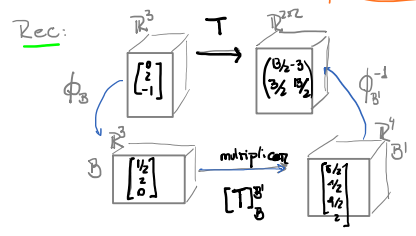

##### 5.**2.** Sea $T \in \mathcal L\left( \mathbb R_2[x], \mathbb R^3 \right)$ la transformación lineal definida por 

$$[T]_{\mathcal B}^{\mathcal C}=\begin{bmatrix}0 & 1 & 1 \\-1 & 0 & 1 \\-2 & 2 & 3\end{bmatrix},$$

donde $\mathcal B$ y $\mathcal C$ son las bases de $\mathbb R_2[x]$ y $\mathbb R^3$, respectivamente, definidas por

$$\mathcal B=\left \{\frac{1}{2}x(x-1), -x(x-2), \frac{1}{2}(x-1)(x-2)\right \},$$

$$\mathcal C=\left \{\begin{bmatrix}2&2&1\end{bmatrix}^T,\begin{bmatrix}-2&1&2\end{bmatrix}^T,\begin{bmatrix}1&-2&2\end{bmatrix}^T.\right \},$$

(**a**) Analizar las propiedades de $T$.

(**b**) Hallar la matriz de $T$ con respecto a la base canónica de $\mathbb R_2[x]$ y la base $\mathcal C$ de $\mathbb R^3$.

(**c**) Hallar la matriz de $T$ con respecto a la base $\mathcal B$ de $\mathbb R_2[x]$ y la base canónica de $\mathbb R^3$.

(**d**) Hallar la matriz de $T$ con respecto a las bases canónicas de $\mathbb R_2[x]$ y $\mathbb R^3$.

(**e**) Hallar la imagen por $T$ del subespacio $gen\{2 + 3x + 2x^2, 5 + 5x + 4x^2\}$

In [ ]:
#(a).
T_B_C = Matrix([[0,1,1],
               [-1,0,1],
               [-2,2,3]])
clasificacion(T)

#(b).

#Forma1
v1 = Matrix([0,'-1/2','1/2'])
v2 = Matrix([0,2,-1])
v3 = Matrix([1,'-3/2','1/2'])
M_B_E = Matrix.hstack(v1,v2,v3)

T_E_C = T_B_C*(M_B_E.inv())

#Forma2
#[p]^B = [p(2) p(1) p(0)]^T
M_E_B = Matrix([[1,2,4],
                [1,1,1],
                [1,0,0]])
T_E_C = T_B_C*M_E_B

#(c).
w1 = Matrix([2,2,1])
w2 = Matrix([-2,1,2])
w3 = Matrix([1,-2,2])
M_C_Ep = Matrix.hstack(w1,w2,w3)

T_B_Ep = M_C_Ep * T_B_C

#(d).
T_E_Ep = M_C_Ep * T_B_C * M_E_B
T_E_Ep

#(e).
gen1_E = Matrix([2,3,2]) #2 + 3x + 2x^2 
gen2_E = Matrix([5,5,4]) #5 + 5x + 4x^2 
Tgen1 = T_E_Ep * gen1_E
Tgen2 = T_E_Ep * gen2_E

Matrix().hstack()
#Forma1
ImT1 =[Tgen1, Tgen2]

#Forma2
ImT2 = algoritmo_espacio_filas([Tgen1, Tgen2])[0]

#check
dos_subespacios_generan_el_mismo_subespacio(ImT1, ImT2)

True

#### **6.** Sea $\mathcal B =\{p_1, p_2, p_3, p_4\}$ una base de $\mathbb R^3$ con 
\begin{align}
p_1 &= \frac{1}{12}(x+2)(x+1)(x-1)\\
p_2 &= -\frac{1}{6}(x+2)(x+1)(x-2)\\
p_3 &=  \frac{1}{6}(x+2)(x-1)(x-2)\\
p_4 &= -\frac{1}{12}(x+1)(x-1)(x-2)
\end{align}
Hallar el vector de coordenadas $\begin{bmatrix}p\end{bmatrix}^B$ con $p(x) = x + \frac12 x^2$

In [ ]:
x = Symbol('x')
p = x + 1/2 * x**2
#Aplico la teoría de polinomios de Lagrange: 
#[p]^B = [p(2) p(1) p(-1) p(-2)]^T
p2 = p.subs({x:2})
p1 = p.subs({x:1})
p1n= p.subs({x:-1})
p2n= p.subs({x:-2})

p_B = Matrix([p2, p1, p1n, p2n])

#### **7.** Hallar la matriz de una simetría/proyección respecto a la $Im(T)$ en la dirección del $Nul(T)$, sabiendo que: $\dots$

##### 7.**a.** Hallar la matriz de una simetría respecto a la $Im(T)$ en la dirección del $Nul(T)$, la cual va de la base $\mathcal B$ a la base $\mathcal B$, es decir $\begin{bmatrix}\sum_{Im(T)Nul(T)}\end{bmatrix}_{\mathcal B}^{\mathcal B}$, donde $\mathcal B = \{v_1, v_2, v_3\}$, sabiendo que: 
\begin{align}
T(v_1) &= v_1 \\ T(v_2) &= v_1 + v_2 \\ T(v_3) &= -v_1
\end{align}

In [ ]:
#B = {v1, v2, v3}
#Escribo T_B_B = [T(v1)^B    T(v2)^B      T(v3)^B   ]
#        T_B_B = [(v1)^B     (v1 + v2)^B  (-v1)^B   ]
#        T_B_B = [[1 0 0]^T  [1 1 0]^T    [-1 0 0]^T]

T_B_B = Matrix([[1, 1, -1],
                [0, 1, 0],
                [0, 0, 0]])

c1, c2 = T_B_B.columnspace()
c3 = T_B_B.nullspace()[0]

#Armo una base con los vectores que acabo de encontrar:
C = [c1, c2, c3]

#Escribo la matriz en la nueva base hallada,
# donde las primeras dos columnas indican respecto de
# que estoy haciendo la simetría, y la última la dirección:
S_C_C = Matrix([[1, 0,  0],
                [0, 1,  0],
                [0, 0, -1]])

#Necesito S_E_E, entonces: S_E_E = M_C_E * S_C_C * M_E_C
M_C_E = Matrix.hstack(*C)
M_E_C = M_C_E.inv()
S_E_E = M_C_E * S_C_C * M_E_C

##### 7.**b.** Hallar la matriz de una proyección sobre la  $Im(T)$ en la dirección del $Nul(T)$, con $T$ definida por $T(x) = Ax$, donde $$A = \begin{bmatrix}-8&-31&-26\\-5&-19&-16\\0&-6&-4\end{bmatrix}$$

In [ ]:
A = Matrix([[-8, -31, -26],
            [-5, -19, -16],
            [ 0,  -6,  -4]])
#Se que Im(T) = Col(A) y que Nu(T) = Nul(A)
ImT = A.columnspace()
NuT = A.nullspace()

#Armo una base con los vectores que acabo de encontrar:
B = [ImT[0], ImT[1], NuT[0]]

#Escribo la matriz en la nueva base hallada,
# donde las primeras dos columnas indican sobre que
# estoy haciendo la proyección, y la última la dirección:
P_B_B = Matrix([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 0]])

#Necesito P_E_E, entonces: P_E_E = M_C_E * P_C_C * M_E_C
M_B_E = Matrix.hstack(*B)
M_E_B = M_B_E.inv()
P_E_E = M_B_E * P_B_B * M_E_B 

#### **8.** Hallar la proyección del vector $\begin{bmatrix}1&1&1\end{bmatrix}^T$ sobre el subespacio $\mathbb S = \{x \in \mathbb R^3: x_1 + x_2 - x_3 = 0 \}$ en la dirección del subespacio $\mathbb T = gen\{\begin{bmatrix}2&2&3\end{bmatrix}^T\}$.

In [ ]:
v = Matrix([1, 1, 1])
sol, sp, S = gauss_jordan_con_generadores(Matrix([[1, 1, -1]]), zeros(1,1))
s1, s2 = S[0], S[1]
T = Matrix([2, 2, 3])
#Como S y T están en suma directa, entonces se que S + T = R3
# Es decir, a.s1 + b.s2 + c.s3 = v  -> hallo los valores de a,b,c
sol, sp, gen = gauss_jordan_con_generadores(Matrix.hstack(s1,s2, T), v) #me quedo con la sol particular
#Como quiero encontrar la proyección de v sobre S:
rta = sp[0]*s1 +sp[1]*s2

#### **9.** Considerando el operador diferencial $L: C^\infty(\mathbb R) \rightarrow C^\infty(\mathbb R)$ definido por $L := \dots$ y la ecuacion diferencial $L[y] = g$ donde $g(x) = \dots$


##### 9.**a.** Considerando el operador diferencial $L: C^\infty(\mathbb R) \rightarrow C^\infty(\mathbb R)$ definido por $L := (D - 5I)(D + 2I)^2$ y la ecuacion diferencial $L[y] = g$ donde $g(x) = 3x^2e^{-2x}$:

#### (**a**) Hallar una base $B_L$ de $Nu(L)$.

#### (**b**) Comprobar que el operador $A = (D + 2I)^3$ es un aniquilador de $g$.

#### (**c**) Hallar una base $B_{AL}$ de $Nu(A \circ L)$ que contenga a la base de $B_L$.

#### (**d**) Comprobar que existe una solución particular $y_p$ de la ecuación $L[y] = g$ perteneciente al subespacio $gen(B_{AL} \setminus B_L)$.

#### (**e**) Hallar la solución general de la ecuación diferencial $L[y] = g$.






In [ ]:
D, I, x, e,a,b,c = symbols('D I x e a b c')

#(a)
Ltext = '(D-5I)*(D+2I)^2'

Nu_L = nucleo_de_operador_diferencial(Ltext)

#(b)
A = (D+2*I)**3
A = expand(A)

g = 3*x**2*e**(-2*x)
g1 = -6*(x-1)*x*e**(-2*x)
g2 = (12*x**2-24*x+6)*e**(-2*x)
g3 = -(24*x**2-72*x+36)*e**(-2*x)
#multiplico por g: 
Ag = A.subs({I**3: g, D*I**2: g1, D**2*I: g2, D**3: g3})
Ag = expand(Ag) # me da 0: A es un aniquilador de g

#(c)
AoLtext = '(D-5I)*(D+2I)^5'
BAL_L = gen_solucion_particular(Ltext, AoLtext)
yp = simplify(a*BAL_L[0] + b*BAL_L[1] + c*BAL_L[2])

#(d)
#se que L[yp] = g
L = expand((D-5*I)*(D+2*I)**2)
yp1 = -x*(2*c*x**3+(2*b-4*c)*x**2+(2*a-3*b)*x-2*a)*e**(-2*x)
yp2 = (4*c*x**4+(4*b-16*c)*x**3+(12*c-12*b+4*a)*x**2+(6*b-8*a)*x+2*a)*e**(-2*x)
yp3 = -(8*c*x**4+(8*b-48*c)*x**3+(72*c-36*b+8*a)*x**2+(-24*c+36*b-24*a)*x-6*b+12*a)*e**(-2*x)

#Hago L[yp]
Lyp = simplify(L.subs({I**3: yp, D*I**2: yp1, D**2*I: yp2, D**3: yp3}))

#Como tiene que ser igual a algo multiplicado por x^2, el resto de grados valen 0:
#resuelvo el sistema de ecuaciones

#Para hallar sol homogenea:
NuL = nucleo_de_operador_diferencial(Ltext)
NuL = list(NuL)
yh = a*NuL[0] + b*NuL[1] + c*NuL[2]
yh

#yg = yh + yp   : les puedo colocar condiciones iniciales

##### 9.**b.** Considerando el operador diferencial $L: C^\infty(\mathbb R) \rightarrow C^\infty(\mathbb R)$ definido por $L := (D - I)(D + I)$ y la ecuacion diferencial $L[y] = g$ donde $g(x) = e^{-x}$, hallar la solución general de la ecuación diferencial $L[y] = g$.

In [ ]:
D, I, x, e,a = symbols('D I x e a')

L = (D-1*I)*(D+1*I)
Ltext = '(D-1I)*(D+1I)'
NuL = nucleo_de_operador_diferencial(Ltext)
NuL = list(NuL)
yh = a*NuL[0] + b*NuL[1] #sol homogenea

A = (D + 1*I)
AL = (D-1*I)*(D+1*I)**2
ALtext = '(D-1I)*(D+1I)^2'
BAL_L = gen_solucion_particular(Ltext, ALtext)
yp = simplify(a*BAL_L[0])

#Hago L[yp]
L = expand(L)
yp1 = diff(yp, x)
yp2 = diff(yp1, x)

Lyp = simplify(L.subs({D**2: yp2, I**2: yp})) #como tiene que ser igual a e^-x, entonces a = -1/2
yp = yp.subs({a: '-1/2'})

yg = yh + yp
yg

##### 9.**c.** Sea $y \in C^\infty (\mathbb R)$ la solución del problema $y'' + 4y = sin(2t), y(0) = 1, y'(0) = 0$. Hallar $y(\frac{\pi}{4})$.

In [ ]:
D, I, x, e,a = symbols('D I x e a')

L = (D**2+4*I)
NuL = [cos(2*x), sin(2*x)] #a mano porque son imaginarios
yh = a*NuL[0] + b*NuL[1] #sol homogenea

#Busco aniquilador de sen(2t)
A = (D**2+4*I)
AL = (D**2+4*I)**2
NuAL = [cos(2*x), sin(2*x), x*cos(2*x), x*sin(2*x)] #a mano porque son imaginarios
gen_yp = list(set(NuAL)- set(NuL))
yp = a*gen_yp[0] + b*gen_yp[1]

#Hago L[yp]
L = expand(L)
yp1 = diff(yp, x)
yp2 = diff(yp1, x)

Lyp = simplify(L.subs({D**2: yp2, I: yp})) #como tiene que ser igual a sen(2x), entonces a = -1/4, b = 0
yp = yp.subs({a: '-1/4', b:0})

yg = yh + yp

#Analizo condiciones iniciales:

#y(0) = 1

yg.subs({x: 0})
#como tiene que ser igual a 1, entonces a = 1
yg = yg.subs({a: 1})

#y'(0) = 0

yg1 = diff(yg, x)
yg1.subs({x: 0})
#como tiene que ser igual a 0, entonces b = 1/8
yg = yg.subs({b: 1/8})

#hallo y(pi/4)
yg.subs({x: pi/4})

### **Ejercicios STOP**

#### 2.**3.** [ver **Ejercicio 1.32**] Sea $T: \mathbb R^5 \rightarrow \mathbb R^5$ la transformación lineal definida por

$$
T(\begin{bmatrix}x_1 & x_2 & x_3 & x_4 & x_5\end{bmatrix}^T)
=
\begin{bmatrix}
-x_1& + x_2& +  x_3& - 2x_4& +  x_5\\
-x_1& &      + 3x_3& - 4x_4& + 2x_5\\
-x_1& &      + 3x_3& - 5x_4& + 3x_5\\
-x_1& &      + 3x_3& - 6x_4& + 4x_5\\
-x_1& &      + 3x_3& - 6x_4& + 4x_5
\end{bmatrix}.
$$



##### 2.3.**a.** Hallar una base del núcleo de $T$.

In [ ]:
A = Matrix([[-1,1,1,-2,1],
            [-1,0,3,-4,2],
            [-1,0,3,-5,3],
            [-1,0,3,-6,4],
            [-1,0,3,-6,4]])

Nu = A.nullspace()

##### 2.3.**b.** Hallar una base de la imagen de $T$.

In [ ]:
A = Matrix([[-1,1,1,-2,1],
            [-1,0,3,-4,2],
            [-1,0,3,-5,3],
            [-1,0,3,-6,4],
            [-1,0,3,-6,4]])

Im = A.columnspace()

##### 2.3.**c.** Comprobar que el vector $b = \begin{bmatrix}1&2&2&2&2\end{bmatrix}^T$ pertenece a la imagen de $T$ y resolver la ecuacion $T(x) = b$.

In [ ]:
A = Matrix([[-1,1,1,-2,1],
            [-1,0,3,-4,2],
            [-1,0,3,-5,3],
            [-1,0,3,-6,4],
            [-1,0,3,-6,4]])

#T(x) = v
#A.x = v
b = Matrix([1,2,2,2,2])
x, x_0, generadores = gauss_jordan_con_generadores(A,b) #veo que existen infinitos [x y z] tal que A.[x y z] = v    =>    v ∈ Im(T)

#### 2.**6.** Sea $T: \mathbb R^3 \rightarrow \mathbb R^3$ la transformación lineal definida por

$$
T\left(\begin{bmatrix}x_1 & x_2 & x_3\end{bmatrix}^T\right) = \begin{bmatrix}bx_3 - x_2 & x_1 - ax_3 & ax_2 - bx_1\end{bmatrix}^T, 
$$

 donde $a, b \in \mathbb R$ son tales que

$$
Im(T) = gen \left\{ \begin{bmatrix}0 & 1 & -1\end{bmatrix}^T, \begin{bmatrix}-1 & 0 & 1\end{bmatrix}^T \right\}.
$$

 Comprobar que $y = \begin{bmatrix}2 & 2 & -4 \end{bmatrix}^T \in Im(T)$ y resolver la ecuación $T(x) = y$


Escribo la imagen de T de una forma más visual:

$$
T\left(\begin{bmatrix}x_1 & x_2 & x_3\end{bmatrix}^T\right) = \begin{bmatrix}bx_3 - x_2 \\ x_1 - ax_3 \\ ax_2 - bx_1\end{bmatrix} =
\begin{bmatrix}
     &  - x_2& + bx_3\\
  x_1&       & - ax_3 \\
-bx_1& + ax_2&
\end{bmatrix}
$$


In [ ]:
a, b = symbols('a, b')
A = Matrix([[ 0, -1,  b], #Se ve la matriz A
            [ 1,  0, -a],
            [-b,  a,  0]])
#Se que Im(T) = Col(A) => {[0 1 -1]^T, [-1 0 1]^T} = {[0 1 -b]^T, [-1 0 a]^T, [b -a 0]^T}
#Obtengo los valores de a y b sabiendo que cada vector de Col(A) es combinación lineal de los vectores de Im(T)
#a = 1, b = 1
A = A.subs({a: 1, b:1}) #Esta es A

y = Matrix([2,2,-4])
x_sol, x_0, generadores = gauss_jordan_con_generadores(A,y) #Soluciones de A.x = y
x_0, generadores

⎛⎡2 ⎤  ⎡⎡1⎤⎤⎞
⎜⎢  ⎥  ⎢⎢ ⎥⎥⎟
⎜⎢-2⎥, ⎢⎢1⎥⎥⎟
⎜⎢  ⎥  ⎢⎢ ⎥⎥⎟
⎝⎣0 ⎦  ⎣⎣1⎦⎦⎠

#### 2.**8.** Sea $T: \mathbb R^2 \rightarrow \mathbb R^2$ la transformación lineal definida por $T(x) := Ax$, donde

$$
A = \begin{bmatrix} 2 & 1 \\ 1 & 2\end{bmatrix},
$$

y sean $e_1, e_2$ los vectores de la base canónica $\mathbb R^2:
e_1 = \begin{bmatrix} 1 & 0\end{bmatrix}^T,
e_2 = \begin{bmatrix} 0 & 1\end{bmatrix}^T.$

Hallar y graficar la imagen de $T$ del conjunto $\mathcal R \in \mathbb R^2$ definido por:

**(a)** $\mathcal R = \left \{e_1, e_2, e_1 + e_2 \right \}$.

**(b)** $\mathcal R$ es el segmento de recta que une a los puntos $e_1, e_2$, es decir, $\mathcal R = C(\left \{e_1, e_2 \right \})$.

**(c)** $\mathcal R$ es el triángulo de vértices $0, e_1, e_2$, es decir, $\mathcal R = (\left \{0, e_1, e_2 \right) \}$.

**(d)** $\mathcal R$ es el cuadrado de vértices $0, e_1, e_2, e_1 + e_2$, es decir, $\mathcal R = (\left \{0, e_1, e_2, e_1 + e_2 \right) \}$.

**(e)** $\mathcal R$ es el paralelogramo de vértices $0, e_1 + e_2, e_1 - e_2, 2e_1$, es decir, $\mathcal R = (\left \{0, e_1 + e_2, e_1 - e_2, 2e_1 \right) \}$.

In [ ]:
A = Matrix([[2, 1],
            [1, 2]])
e1 = Matrix([1, 0])
e2 = Matrix([0, 1])
z = zeros(2, 1)
#(a)
Ra = [A*e1, A*e2, A*(e1+e2)]

#(b)
Rb = [A*e1, A*e2]                        #Recta que une los puntos de R

#(c)
Rc = [A*z, A*e1, A*e2]                   #Triángulo de vértices R

#(d)
Rd = [A*z, A*e1, A*e2, A*(e1+e2)]        #Cuadrado de vértices R

#(e)
Re = [A*z, A*(e1+e2), A*(e1-e2), A*2*e1] #Paralelogramo de vértices R

#### 2.**12.** Sea $\mathcal{B}$ una base de $\mathbb{R}^3$ definida por:

$$
\mathcal{B} = \left\{ 
  \begin{bmatrix} 2 &  2 & 1 \end{bmatrix}^T,
  \begin{bmatrix}-2 &  1 & 2 \end{bmatrix}^T,
  \begin{bmatrix} 1 & -2 & 2 \end{bmatrix}^T
  \right\}
$$

 y sea $T : \mathbb{R}^3 \rightarrow \mathbb{R}^3$ una transformación lineal que actúa sobre $\mathcal{B}$ de la siguiente manera:

 $$
\begin{align}
T\left( \begin{bmatrix} 2 &  2 & 1 \end{bmatrix}^T \right) &= 
\begin{bmatrix} 2 & -1 & -1 \end{bmatrix}^T \\
T\left( \begin{bmatrix} -2 &  1 & 2 \end{bmatrix}^T \right) &= 
\begin{bmatrix} -1 & 2 & -1 \end{bmatrix}^T \\
T\left( \begin{bmatrix} 1 & -2 & 2 \end{bmatrix}^T \right) &= 
\begin{bmatrix} -1 & -1 & 2 \end{bmatrix}^T \\
\end{align}
$$

 **( a )** Hallar la imagen por $T$ de $\mathbb{S} = gen \left\{ \begin{bmatrix} 1 &  0 & 1 \end{bmatrix}^T, \begin{bmatrix} 1 &  1 &  5 \end{bmatrix}^T \right\}$


 **( b )** Hallar la preimagen por $T$ del subespacio $U =   \left\{ y \in \mathbb{R}^3 : y_1 - y_3 = 0, y_1 + y_2 + y_3 = 0 \right\}$

In [ ]:
v1, v2, v3 = Matrix([2,2,1]), Matrix([-2,1,2]), Matrix([1,-2,2])
w1, w2, w3 = Matrix([2,-1,-1]), Matrix([-1,2,-1]), Matrix([-1,-1,2])

B = [v1, v2, v3]
W = [w1, w2, w3]

#(a)
s1, s2 = Matrix([1,0,1]), Matrix([1,1,5])
S = [s1, s2]
imagen = imagen_por_T_de_S_con_B_y_W(B, W, S)

#(b)
u1, u2 = Matrix([[1,0,-1]]), Matrix([[1,1,1]])
Au = Matrix.vstack(u1,u2)

#Forma 1
preimagen1 = preimagen_subespacio_con_B_y_W(B, W, Au)

#Forma 2
At = matriz_tl_con_base_y_transformados(B, W)
preimagen2 = preimagen_subespacio_con_At(At, Au)
preimagen2

dos_subespacios_generan_el_mismo_subespacio(preimagen1, preimagen2) #check

True

#### 2.**17.** Sea $T \in \mathcal L\left( \mathbb R_2[x], \mathbb R^3 \right)$ la transformación lineal definida por 

$$
[T]_{\mathcal B}^{\mathcal C}
=
\begin{bmatrix}
   0 & 1 & 1 \\
  -1 & 0 & 1 \\
  -2 & 2 & 3
\end{bmatrix}, 
$$

 donde $\mathcal B$ y $\mathcal C$ son las bases de $\mathbb R_2[x]$ y $\mathbb R^3$, respectivamente, definidas por

$$
\mathcal B
=
\left \{
  \frac{1}{2}x(x-1), -x(x-2), \frac{1}{2}(x-1)(x-2)
\right \},
$$

$$
\mathcal C
=
\left \{
  \begin{bmatrix}2&2&1\end{bmatrix}^T,
  \begin{bmatrix}-2&1&2\end{bmatrix}^T,
  \begin{bmatrix}1&-2&2\end{bmatrix}^T.
\right \},
$$

(**a**) Analizar las propiedades de $T$.

(**b**) Hallar la matriz de $T$ con respecto a la base canónica de $\mathbb R_2[x]$ y la base $\mathcal C$ de $\mathbb R^3$.

(**c**) Hallar la matriz de $T$ con respecto a la base $\mathcal B$ de $\mathbb R_2[x]$ y la base canónica de $\mathbb R^3$.

(**d**) Hallar la matriz de $T$ con respecto a las bases canónicas de $\mathbb R_2[x]$ y $\mathbb R^3$.

(**e**) Hallar la imagen por $T$ del subespacio $gen\{2 + 3x + 2x^2, 5 + 5x + 4x^2\}$

In [ ]:
#(a).
T_B_C = Matrix([[0,1,1],
               [-1,0,1],
               [-2,2,3]])
clasificacion(T)

#(b).

#Forma1
v1 = Matrix([0,'-1/2','1/2'])
v2 = Matrix([0,2,-1])
v3 = Matrix([1,'-3/2','1/2'])
M_B_E = Matrix.hstack(v1,v2,v3)

T_E_C = T_B_C*(M_B_E.inv())

#Forma2
#[p]^B = [p(2) p(1) p(0)]^T
M_E_B = Matrix([[1,2,4],
                [1,1,1],
                [1,0,0]])
T_E_C = T_B_C*M_E_B

#(c).
w1 = Matrix([2,2,1])
w2 = Matrix([-2,1,2])
w3 = Matrix([1,-2,2])
M_C_Ep = Matrix.hstack(w1,w2,w3)

T_B_Ep = M_C_Ep * T_B_C

#(d).
T_E_Ep = M_C_Ep * T_B_C * M_E_B
T_E_Ep

#(e).
gen1_E = Matrix([2,3,2]) #2 + 3x + 2x^2 
gen2_E = Matrix([5,5,4]) #5 + 5x + 4x^2 
Tgen1 = T_E_Ep * gen1_E
Tgen2 = T_E_Ep * gen2_E

Matrix().hstack()
#Forma1
ImT1 =[Tgen1, Tgen2]

#Forma2
ImT2 = algoritmo_espacio_filas([Tgen1, Tgen2])[0]

#check
dos_subespacios_generan_el_mismo_subespacio(ImT1, ImT2)

True

#### 2.**18.** Sea $T_1 \in \mathcal L(\mathbb R^3)$ la transformación lineal definida por:

$$
T_1(\begin{bmatrix}1&1&0\end{bmatrix}^T) = \begin{bmatrix}1&-\frac{3}{2}&2\end{bmatrix}^T
\\
T_1(\begin{bmatrix}1&-1&0\end{bmatrix}^T) = \begin{bmatrix}-3&\frac{9}{2}&-6\end{bmatrix}^T
\\
T_1(\begin{bmatrix}0&0&1\end{bmatrix}^T) = \begin{bmatrix}2&-3&4\end{bmatrix}^T
$$

y sea $T_2 \in \mathcal L(\mathbb R^3, \mathbb R_2[x])$ la transformación lineal definida por:

$$
T_2\left(\begin{bmatrix}a&b&c\end{bmatrix}^T\right) := (a + b) + (a + c)x + (b + c)x^2.
$$

(**a**) Hallar las matrices de $T_1, T_2, T_2^{-1}$ con respecto a las bases canónicas que correspondan.

(**b**) Hallar la matriz de $T_1 o  T_2^{-1}$ con respecto a las mismas bases y utilizarla para hallar una base de $Nu(T_1 o  T_2^{-1})$.



In [ ]:
x = Symbol('x')
#(a)

#T1

v1 = Matrix([1,1,0])
v2 = Matrix([1,-1,0])
v3 = Matrix([0,0,1])
M_B_E = Matrix.hstack(v1,v2,v3)

E = [eye(3,3).col(0), eye(3,3).col(1), eye(3,3).col(2)] #R3

w1 = Matrix([1,'-3/2',2])
w2 = Matrix([-3,'9/2',-6])
w3 = Matrix([2,-3,4])
T1_B_E = Matrix.hstack(w1,w2,w3)

T1_E_E = T1_B_E * M_B_E.inv()

#T2

Ep = Matrix([[1, x, x**2]])

# Te1 = 1 + x    #Te2 = 1 + x^2,    #Te3 = x + x^2
# T_E_Ep = [ [Te1]^Ep [Te2]^Ep [Te3]^Ep] = [ [1 1 0]^T [1 0 1]^T [0 1 1]^T]
T2_E_Ep = Matrix([[1,1,0],
                  [1,0,1],
                  [0,1,1]])

#T2^(-1)
T2inv_E_Ep = T2_E_Ep.inv()

#(b)
T1oT2inv_Eprima_E = T1_E_E * T2inv_E_Ep
nucleo = nucleo_de_T_con_At_B_Bprima_pol(T1oT2inv_Eprima_E, Ep)

#### 2.**20.** Sean $\mathbb V$ un $\mathbb R$-espacio vectorial de dimensión 3, $\mathcal B = \{v_1, v_2, v_3\}$ una base de $\mathbb V, \mathbb S_1$ y $\mathbb S_2$ los subespacios de $\mathbb V$ definidos por:

$$\mathbb S_1 = gen\{ v_1 - 2v_2, v_1 + v_3\}, \quad\mathbb S_2 = gen\{ v_2 - v_3\}.$$

(**a**) Comprobar que $\mathbb V = \mathbb S_1 \oplus \mathbb S_2$

(**b**) Hallar las matrices con respecto a la base $\mathcal B$ de las proyecciones y simetrias inducidas por la partición $\mathbb V = \mathbb S_1 \oplus \mathbb S_2$

In [ ]:
#(a)
s11 = Matrix([1, -2, 0])
s12 = Matrix([1, 0, 1])
s2 = Matrix([0,1,-1])

S1 = [s11, s12]
S2 = [s2]

union = union_S1_S2(S1, S2)

#dim(union) = dim(S1) + dim(S2) - dim(interseccion)
#dim(interseccion) = 0 => Están en suma directa


(**b**) Para que resulte más visual, lo escribo:

Con $\mathcal B = \{v_1,v_2, v_3\}$, $\mathcal B' = \{\underbrace{v_1 - 2v_2, v_1+v_3}_{\in \space \mathbb S_1}, \underbrace{v_2 - v_3}_{\in \space \mathbb S_2}\}$ 

Me piden $T_{\mathcal B}^{\mathcal B}$.

Obtengo $M_{\mathcal B}^{\mathcal B'}$ y $T_{\mathcal B'}^{\mathcal B}$, tal que $T_{\mathcal B}^{\mathcal B}$ = $T_{\mathcal B'}^{\mathcal B}$ $M_{\mathcal B}^{\mathcal B'}$.


* $M_{\mathcal B}^{\mathcal B'}$:

  **Forma 1**: construyo la matriz.
  
  $M_{\mathcal B}^{\mathcal B'} = \begin{bmatrix}\begin{bmatrix}v_1\end{bmatrix}^{\mathcal B'}\begin{bmatrix}v_2\end{bmatrix}^{\mathcal B'}\begin{bmatrix}v_3\end{bmatrix}^{\mathcal B'}\end{bmatrix}$.

  Busco cada $[v]^{\mathcal B'}$ como $v = M_{\mathcal B'}^E [v]^{\mathcal B'}$

  **Forma 2**:
  
  $M_{\mathcal B}^{\mathcal B'} = \underbrace{M_{E}^{\mathcal B'}}_{\left(M_{\mathcal B'}^{E}\right)^{-1}} M_{\mathcal B}^{ E}$.

* $T_{\mathcal B'}^{\mathcal B}$: depende de cada tranformación.

$\underline{\text{Busco la proyeccion de } v \text{ sobre } \mathbb S_1 \text{ en direccion de } \mathbb S_2: \Pi_{\mathbb S_1 \mathbb S_2}}$

Defino $T$ tal que los transformados de los elementos $\in \mathbb S_1$ van a sí mismos, y los transformados de los elementos $\in \mathbb S_2$ van al $0$:

$
T(v_1 - 2v_2) = v_1 - 2v_2\\
T(v_1 + v_3) = v_1 + v_3\\
T(v_2 - v_3) = 0\\
$

Armo entonces $T_{\mathcal B'}^{\mathcal B}$. Tengo dos formas, igual que antes:

  **Forma 1**: construyo la matriz.
  
  $T_{\mathcal B'}^{\mathcal B} = \begin{bmatrix}\begin{bmatrix}v_1-2v_2\end{bmatrix}^{\mathcal B}\begin{bmatrix}v_1+v_3\end{bmatrix}^{\mathcal B}\begin{bmatrix}v_2-v_3\end{bmatrix}^{\mathcal B}\end{bmatrix}$.

  Busco cada $[v]^{\mathcal B}$ como $v = M_{\mathcal B}^E [v]^{\mathcal B}$

  **Forma 2**:
  
  $T_{\mathcal B'}^{\mathcal B} = \underbrace{M_{E}^{\mathcal B}}_{\left(M_{\mathcal B}^{E}\right)^{-1}} T_{\mathcal B'}^{ E} \quad \mathrm{\ con\ } T_{\mathcal B'}^{ E} = \begin{bmatrix}\begin{bmatrix}v_1-2v_2\end{bmatrix}^E&\begin{bmatrix}v_1+v_3\end{bmatrix}^E&\begin{bmatrix}v_2-v_3\end{bmatrix}^E\\\end{bmatrix} = \begin{bmatrix}1&1&0\\-2&0&1\\0&1&-1\end{bmatrix}$ 

$ \\ $

Finalmente realizo la cuenta: $T_{\mathcal B}^{\mathcal B}$ = $T_{\mathcal B'}^{\mathcal B}$ $M_{\mathcal B}^{\mathcal B'}$.

__________

$\rightarrow$ para cada transformación (las proyecciones y simetrías) defino su correspondiente $T$, y procedo de la misma manera.

La definición de $T$ es tal que:

$$
\Pi_{\mathbb S_1 \mathbb S_2}(v) = \left\{
	       \begin{array}{ll}
		 v      & \mathrm{si\ } v \in \mathbb S_1\\
		 0     & \mathrm{si\ } v \in \mathbb S_2
	       \end{array}
	     \right. 
\quad
\Pi_{\mathbb S_2 \mathbb S_1}(v) = \left\{
	       \begin{array}{ll}
		 v      & \mathrm{si\ } v \in \mathbb S_2\\
		 0     & \mathrm{si\ } v \in \mathbb S_1
	       \end{array}
	     \right. 
$$

$ \\ $

$$
\Sigma_{\mathbb S_1 \mathbb S_2}(v) = \left\{
	       \begin{array}{ll}
		 v      & \mathrm{si\ } v \in \mathbb S_1\\
		 -v     & \mathrm{si\ } v \in \mathbb S_2
	       \end{array}
	     \right. 
\quad
\Sigma_{\mathbb S_2 \mathbb S_1}(v) = \left\{
	       \begin{array}{ll}
		 v      & \mathrm{si\ } v \in \mathbb S_2\\
		 -v     & \mathrm{si\ } v \in \mathbb S_1
	       \end{array}
	     \right. 
$$

Otra forma de resolver el resto de transformaciones es utilizando las propiedades:

$
\Pi_{\mathbb S_1 \mathbb S_2} + \Pi_{\mathbb S_2 \mathbb S_1} = I _{\mathbb V}\\
\Sigma_{\mathbb S_1 \mathbb S_2} + \Sigma_{\mathbb S_2 \mathbb S_1} = O _{\mathbb V^{\mathbb V}}\\
\Sigma_{\mathbb S_1 \mathbb S_2} + 2 \Pi_{\mathbb S_2 \mathbb S_1} = I _{\mathbb V}\\
\Sigma_{\mathbb S_2 \mathbb S_1} + 2 \Pi_{\mathbb S_1 \mathbb S_2} = I _{\mathbb V}
$


In [ ]:
#(b)
u1 = Matrix([1,-2,0])
u2 = Matrix([1,0,1])
u3 = Matrix([0,1,-1])
M_Bp_E = Matrix.hstack(u1,u2,u3)

e1 = Matrix([1,0,0])
e2 = Matrix([0,1,0])
e3 = Matrix([0,0,1])
M_B_E = Matrix.hstack(e1,e2,e3)

M_B_Bp = M_Bp_E.inv() * M_B_E
M_B_Bp

#____ Proyección sobre S1 en dirección de S2

Tu1 = u1
Tu2 = u2
Tu3 = Matrix([0,0,0])
T_Bp_E = Matrix.hstack(Tu1, Tu2, Tu3)

#Se que [T]_Bp_B = [[Tu1]_B [Tu2]_B [Tu3]_B] #puedo hacerlo asi
#O puedo hacerlo multiplicando matrices:
T_Bp_B = M_B_E.inv() * T_Bp_E

proyeccion_S1_S2 = T_Bp_B * M_B_Bp #Lo cambio de base porque me pide el enunciado: T_B_B
tipo_tl(proyeccion_S1_S2) #check

#____ Proyección sobre S2 en dirección de S1

#Forma 1: Proyeccion_S1_S2 + Proyeccion_S2_S1 = I
proyeccion_S2_S1 = eye(3,3) - proyeccion_S1_S2

#Forma 2: Igual que antes
Tu1 = Matrix([0,0,0])
Tu2 = Matrix([0,0,0])
Tu3 = u3
T_Bp_E = Matrix.hstack(Tu1, Tu2, Tu3)

T_Bp_B = M_B_E.inv() * T_Bp_E

proyeccion_S2_S1 = T_Bp_B * M_B_Bp
tipo_tl(proyeccion_S2_S1) #check

#____ Simetría con respecto a S1 en dirección de S2

#Forma 1: simetria_S1_S2 + 2 * Proyeccion_S2_S1 = I
simetria_S1_S2 = eye(3,3) - 2*proyeccion_S2_S1

#Forma 2: Igual que antes
Tu1 = u1
Tu2 = u2
Tu3 = -u3
T_Bp_E = Matrix.hstack(Tu1, Tu2, Tu3)

T_Bp_B = M_B_E.inv() * T_Bp_E

simetria_S1_S2 = T_Bp_B * M_B_Bp
tipo_tl(simetria_S1_S2) #check

#____ Simetría con respecto a S2 en dirección de S1

#Forma 1: simetria_S1_S2 + simetria_S2_S1 = 0
simetria_S2_S1 = zeros(3,3) - simetria_S1_S2

#Forma 2: Igual que antes
Tu1 = -u1
Tu2 = -u2
Tu3 = u3
T_Bp_E = Matrix.hstack(Tu1, Tu2, Tu3)

T_Bp_B = M_B_E.inv() * T_Bp_E

simetria_S2_S1 = T_Bp_B * M_B_Bp
tipo_tl(simetria_S2_S1) #check

'Es una simetría'

#### 2.**24.** Sean $T, S \in \mathcal L(\mathbb R^3)$ las transformaciones lineales definidas por

$$T\left( \begin{bmatrix}x_1\\x_2\\x_3 \end{bmatrix}\right):=\begin{bmatrix}\frac{1}{2}&0&-\frac{1}{2} \\ 0&0&0 \\ -\frac{1}{2}&0&\frac{1}{2}\end{bmatrix} \begin{bmatrix}x_1\\x_2\\x_3 \end{bmatrix}\quad y \quad S\left( \begin{bmatrix}x_1\\x_2\\x_3 \end{bmatrix}\right):=\begin{bmatrix}0&0&1 \\ 0&-1&0 \\ 1&0&0 \end{bmatrix} \begin{bmatrix}x_1\\x_2\\x_3 \end{bmatrix}.$$

(**a**) Comprobar que $T$ es una proyeccion y hallar una base $\mathcal B$ de $\mathbb R^3$ tal que

$$[T]_{\mathcal B}^{\mathcal B} = \begin{bmatrix}1&0&0\\0&0&0\\0&0&0\end{bmatrix}.$$

(**a**) Comprobar que $S$ es una simetria y hallar una base $\mathcal B$ de $\mathbb R^3$ tal que

$$[S]_{\mathcal B}^{\mathcal B} = \begin{bmatrix}1&0&0\\0&-1&0\\0&0&-1\end{bmatrix}.$$



In [ ]:
#(a)

T = Matrix([['1/2', 0, '-1/2'],
            [0,0,0],
            ['-1/2', 0, '1/2']])
tipo_tl(T) 

#Veo que la proyección actua dejando el primer vector igual, y v2 y v3 los lleva al 0, es decir:
#T(v1) = v1
#T(v2) = 0
#T(v3) = 0
#Entonces v1 pertenece a Im(T),   v2 y v3 a Nu(T)
v1 = T.columnspace()[0]
v2, v3 = T.nullspace()

B = [v1, v2, v3]

#(b)

S = Matrix([[1, 0, 0],
            [0,-1, 0],
            [0, 0, -1]])
tipo_tl(S) 

#Uso que V = Nu(I-S) ⊕ Nu(I+S)
nu_I_menos_S = (eye(3,3) - S).nullspace()
nu_I_mas_S = (eye(3,3) + S).nullspace()

B = union_S1_S2(nu_I_menos_S, nu_I_mas_S)

#### 2.**30.** Se considera el operador diferencial $L: C^\infty(\mathbb R) \rightarrow C^\infty(\mathbb R)$ definido por $$L := (D - 2I)(D - 4I)(D + 3I)^2$$ y la ecuacion diferencial $L[y] = p$ donde $p(x) = 5x^3e^{-3x}$:

#### (**a**) Hallar una base $B_L$ de $Nu(L)$.

#### (**b**) Comprobar que el operador $A = (D + 3I)^4$ es un aniquilador de $p$: $A[p] = 0$.

#### (**c**) Hallar una base $B_{AL}$ de $Nu(A \circ L)$ que contenga a la base de $B_L$.

#### (**d**) Comprobar que existe una solución particular $y_p$ de la ecuación $L[y] = p$ perteneciente al subespacio $gen(B_{AL} \setminus B_L)$.

#### (**e**) Hallar la solución general de la ecuación diferencial $L[y] = p$.




In [ ]:
a,b,c,d,e,x = symbols('a b c d e x')

#(a)
#Hallo base de L a ojo o con:
Ltext = '(D-2I)*(D-4I)*(D+3I)^2'
NuL = nucleo_de_operador_diferencial(Ltext)

#(b)
#Escribo A
A = (D+3*I)**4
A = expand(A)
 
#Escribo p y sus derivadas (las hice con una calculadora de derivadas)
p = 5*x**3*e**(-3*x)
p1 = -15*(x-1)*x**2*e**(-3*x)
p2 = (45*x**3-90*x**2+30*x)*e**(-3*x)
p3 = -(135*x**3-405*x**2+270*x-30)*e**(-3*x)
p4 =  (405*x**3-1620*x**2+1620*x-360)*e**(-3*x)

#Multiplico por p (hago la derivada donde corresponda, D es el operador derivación): 
Ag = A.subs({D**4: p4, D**3*I: p3, D**2*I**2: p2, D*I**3: p1, I**4: p})
Ag = expand(Ag) # me da 0: A es un aniquilador de g

#(c)
#Hago AoL, busco nuAoL, y le quito los elementos de nuL: nuAoL / nuL
BAL_L = gen_solucion_particular('(D-2I)*(D-4I)*(D+3I)^2', '(D-2I)*(D-4I)*(D+3I)^6')

#(d)
#y particular es una combinación lineal de los generadores de nuAol / nuL
yp = simplify(a*BAL_L[0] + b*BAL_L[1] + c*BAL_L[2] + d*BAL_L[3])

#tengo variables a, b, c, d: las busco
#se que L[yp] = p

#Veo cuanto es L:
L = (D-2*I)*(D-4*I)*(D+3*I)**2
L = expand(L)

#Veo cuanto valen las derivadas de yp
yp1 = -x*(3*d*x**4+(3*c-5*d)*x**3+(3*b-4*c)*x**2+(3*a-3*b)*x-2*a)*e**(-3*x)
yp2 = (9*d*x**5+(9*c-30*d)*x**4+(20*d-24*c+9*b)*x**3+(12*c-18*b+9*a)*x**2+(6*b-12*a)*x+2*a)*e**(-3*x)
yp4 = (81*d*x**5+(81*c-540*d)*x**4+(1080*d-432*c+81*b)*x**3+(-720*d+648*c-324*b+81*a)*x**2+(120*d-288*c+324*b-216*a)*x+24*c-72*b+108*a)*e**(-3*x)

#Hago L[yp]
Lyp = L.subs({D**4: yp4, D**2*I**2: yp2, D*I**3: yp1, I**4: yp})
simplify(Lyp.subs({e**(-3*x): 1})) #me olvido de e^(-3x), es irrelevante

#Como L[yp] = p, veo cuánto debe valer cada coeficiente que multiplica x^algo
#p = 5 x^3 e^(-3x) => el coeficiente que multiplica a x^3 debe ser 5, el resto 0

#(e)
#y = yp + yh
#yp ya lo obtuve
#yh es la combinación lineal de los generadores de Nu(L)